***Surya Dwi Prasetya (SC62524)***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV,RepeatedStratifiedKFold,learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,recall_score,make_scorer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#!pip install jcopml

In [ ]:
df = pd.read_csv("heart_preprocessing.csv")

di sini saya menggunakan dataset preprosesing yang saya gunakan di assignment 2, saya mendownloadnya dan menyimpannya dengan nama heart_preprocessing.csv

# **KNN**

---

saya memilih menggunakan KNN untuk modeling ini karena alasan berikut
1. KNN mampu menangani hubungan non-linear antara fitur-fitur kompleks yang sering ditemukan dalam kasus penyakit jantung, karena hubungan non-linear antara fitur-fitur kompleks sering ditemukan dalam kasus penyakit jantung, Ini membuat KNN dapat menyesuaikan pola yang kompleks dalam data medis
2. kelebihan KNN dalam ketergantungannya pada lokalitas, dimana KNN menggunakan informasi dari tetangga terdekat untuk membuat prediksi, yang berarti prediksi KNN cenderung dipengaruhi oleh kasus-kasus yang mirip secara lokal.
3. Meskipun dataset seperti penyakit jantung rentan terhadap outlier, strategi preprocessing data yang tepat dan pemilihan parameter yang sesuai, seperti jumlah n_neighbors yang tepat, dapat membantu mengurangi dampak outlier dan meningkatkan kinerja KNN.

# **KNN Model sederhana**

In [ ]:
x = df.drop(["target"],axis=1)
y = df["target"]

KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(x,y)

print(f"akurasi skore n_neighbors= 11: {KNN.score(x,y)}")
print("\n")

y_pred = KNN.predict(x)
print(f"Preiksi score n_neighbors= 11: {accuracy_score(y,y_pred)}")
print("\n")

print(f"Confusion Matrix n_neighbors= 11: \n{confusion_matrix(y, y_pred)}")
print("\n")

print("Classification Report n_neighbors= 11:")
print(classification_report(y, y_pred))
print("\n")

print(f"\nROC AUC Score n_neighbors= 11: {roc_auc_score(y, y_pred)}")

akurasi skore n_neighbors= 11: 0.766


Preiksi score n_neighbors= 11: 0.766


Confusion Matrix n_neighbors= 11: 
[[364 128]
 [106 402]]


Classification Report n_neighbors= 11:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       492
           1       0.76      0.79      0.77       508

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000




ROC AUC Score n_neighbors= 11: 0.7655879905255745


kode di atas adalah kode sederhana untuk KNN, saya membaginya menjadi 2, yaitu x mewakili kolom fitur pada dataset penyakit jantung yang sudah saya preprosesing, dan y mewakili kolom targetnya, kemudian saya melakukan pelatihan model KNN sederhana, adapun beberapa matrik evaluasi yang saya gunakan di atas atara lain ialah Akurasi Skor, Prediksi Score, Confusion Matrix, Classification Report, dan ROC AUC Score

Dalam dataset penyakit jantung ini, saya memutuskan menggunakan recall sebagai matriks evaluasi utama dikarenakan saya ingin meminimalkan jumlah kasus positif yang salah terlewatkan (False Negative), sehingga saya dapat memastikan bahwa model saya dapat menemukan sebanyak mungkin kasus penyakit jantung yang sebenarnya, sehingga kedepannya saya hanya akan mengevaluasi model saya menggunakan recall

# KNN train test split dan parameter tunning n_neighbors


Classification Report train n_neighbors=1 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

recall score train n_neighbors=1 :
1.0

Classification Report test n_neighbors=1 :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       1.00      0.97      0.99       102

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

recall score test n_neighbors=1 :
0.9705882352941176


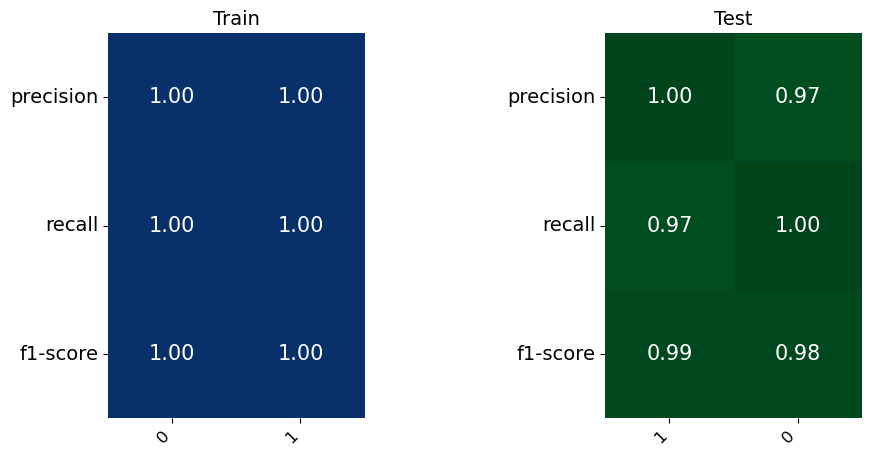


Classification Report train n_neighbors=3 :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

recall score train n_neighbors=3 :
0.9975369458128078

Classification Report test n_neighbors=3 :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        98
           1       0.95      0.95      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

recall score test n_neighbors=3 :
0.9509803921568627


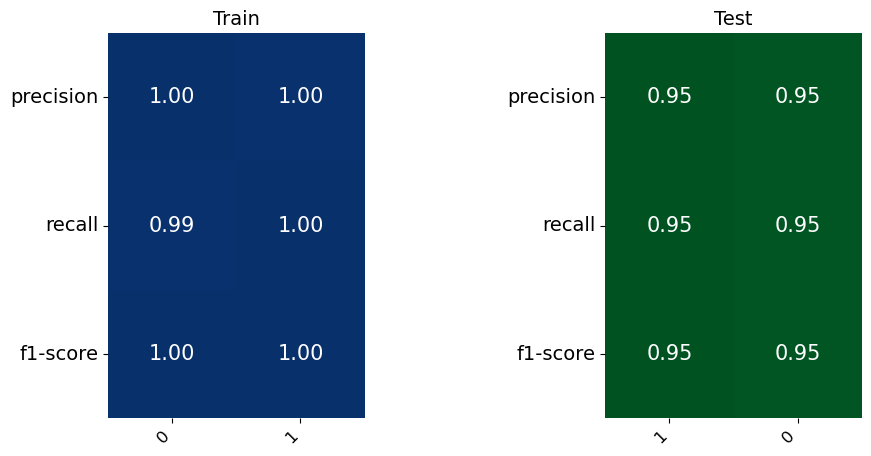


Classification Report train n_neighbors=5 :
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       394
           1       0.93      0.89      0.91       406

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

recall score train n_neighbors=5 :
0.8891625615763546

Classification Report test n_neighbors=5 :
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        98
           1       0.78      0.73      0.75       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

recall score test n_neighbors=5 :
0.7254901960784313


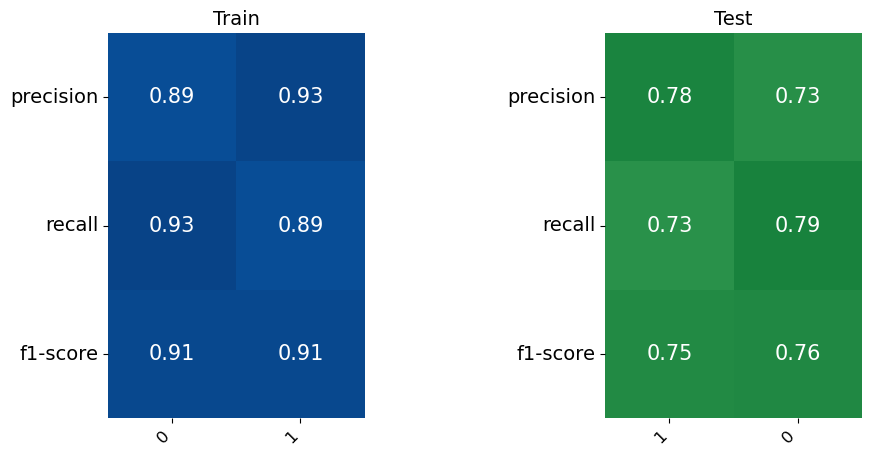


Classification Report train n_neighbors=7 :
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       394
           1       0.85      0.74      0.79       406

    accuracy                           0.80       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.80      0.80       800

recall score train n_neighbors=7 :
0.7413793103448276

Classification Report test n_neighbors=7 :
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        98
           1       0.80      0.76      0.78       102

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200

recall score test n_neighbors=7 :
0.7647058823529411


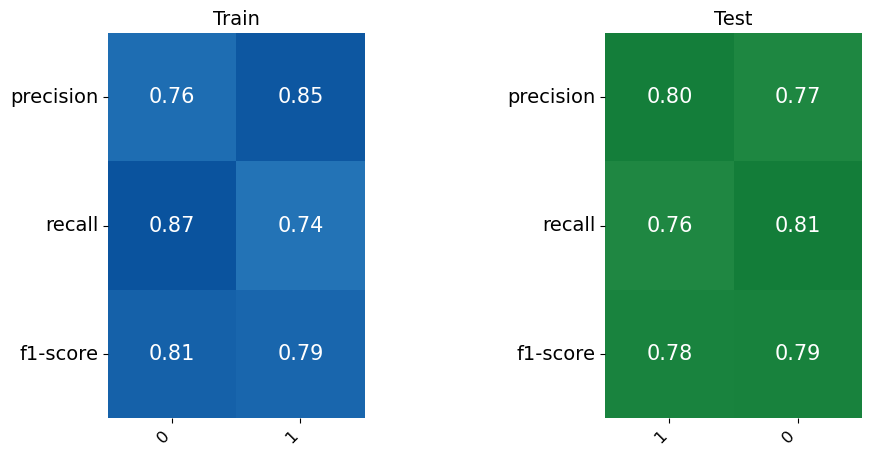


Classification Report train n_neighbors=9 :
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       394
           1       0.75      0.75      0.75       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

recall score train n_neighbors=9 :
0.7487684729064039

Classification Report test n_neighbors=9 :
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        98
           1       0.80      0.75      0.77       102

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200

recall score test n_neighbors=9 :
0.7450980392156863


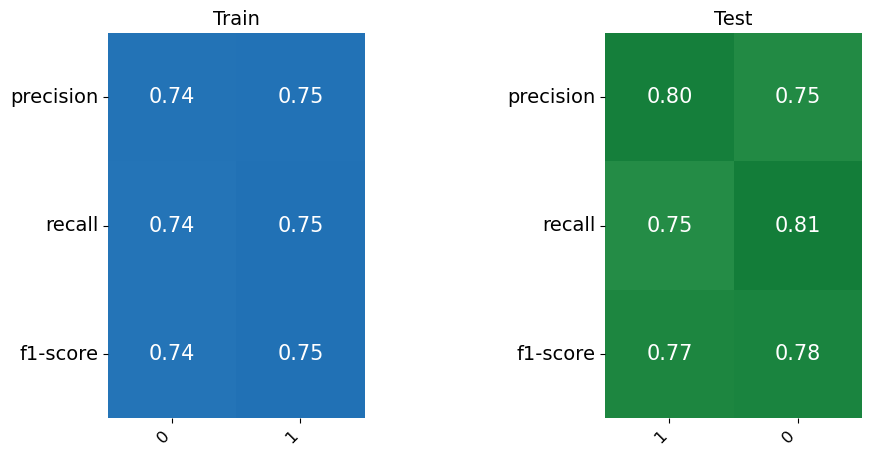


Classification Report train n_neighbors=11 :
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       394
           1       0.77      0.74      0.75       406

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

recall score train n_neighbors=11 :
0.7364532019704434

Classification Report test n_neighbors=11 :
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        98
           1       0.75      0.70      0.72       102

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200

recall score test n_neighbors=11 :
0.696078431372549


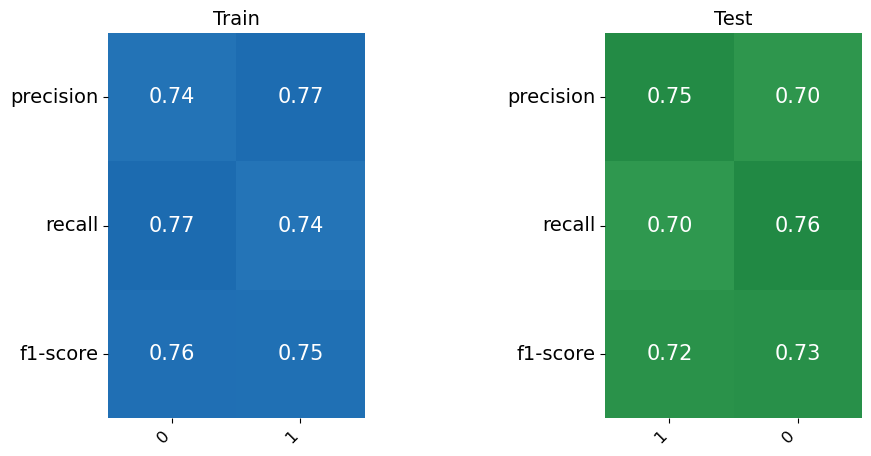


Classification Report train n_neighbors=13 :
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       394
           1       0.75      0.75      0.75       406

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

recall score train n_neighbors=13 :
0.7512315270935961

Classification Report test n_neighbors=13 :
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        98
           1       0.73      0.72      0.72       102

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

recall score test n_neighbors=13 :
0.7156862745098039


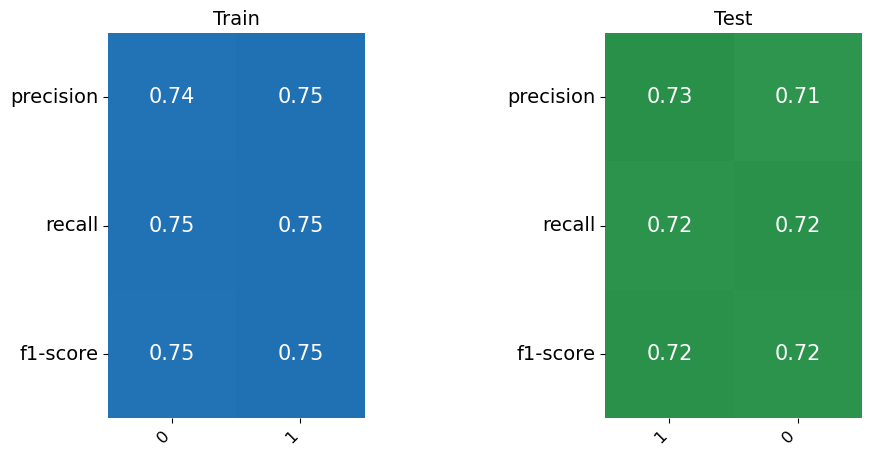


Classification Report train n_neighbors=15 :
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       394
           1       0.76      0.78      0.77       406

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

recall score train n_neighbors=15 :
0.7807881773399015

Classification Report test n_neighbors=15 :
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        98
           1       0.75      0.74      0.74       102

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

recall score test n_neighbors=15 :
0.7352941176470589


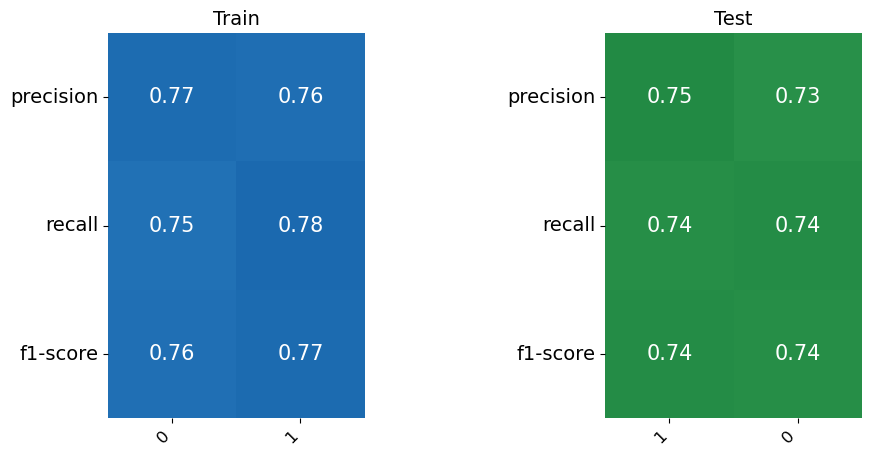


Classification Report train n_neighbors=17 :
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       394
           1       0.75      0.77      0.76       406

    accuracy                           0.76       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.76      0.76      0.75       800

recall score train n_neighbors=17 :
0.7660098522167488

Classification Report test n_neighbors=17 :
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        98
           1       0.73      0.73      0.73       102

    accuracy                           0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.73       200

recall score test n_neighbors=17 :
0.7254901960784313


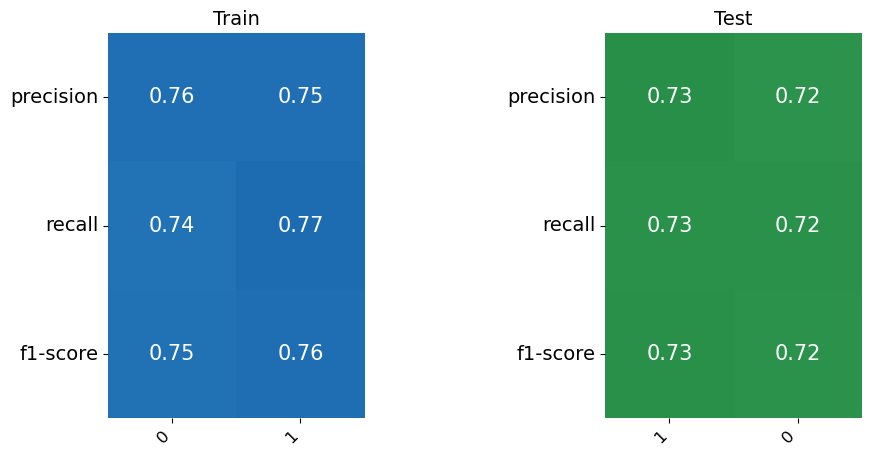


Classification Report train n_neighbors=19 :
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       394
           1       0.74      0.75      0.74       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

recall score train n_neighbors=19 :
0.7487684729064039

Classification Report test n_neighbors=19 :
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        98
           1       0.71      0.73      0.72       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

recall score test n_neighbors=19 :
0.7254901960784313


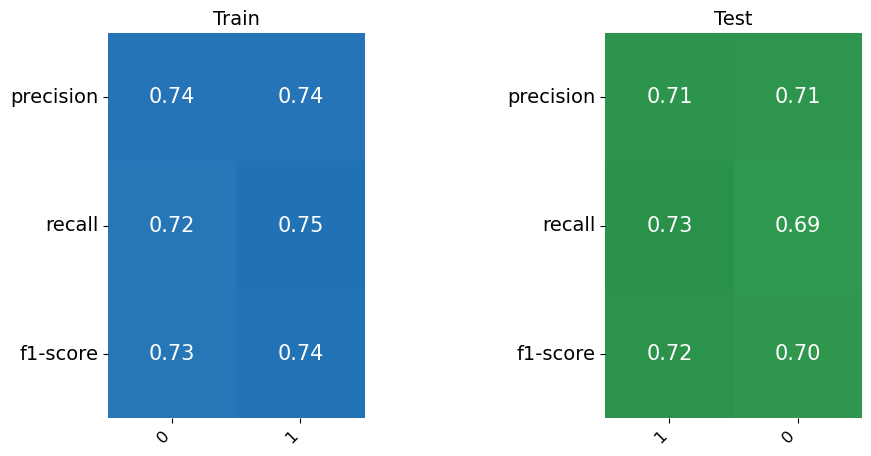


Classification Report train n_neighbors=21 :
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       394
           1       0.74      0.77      0.75       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

recall score train n_neighbors=21 :
0.7660098522167488

Classification Report test n_neighbors=21 :
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        98
           1       0.74      0.75      0.75       102

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

recall score test n_neighbors=21 :
0.7549019607843137


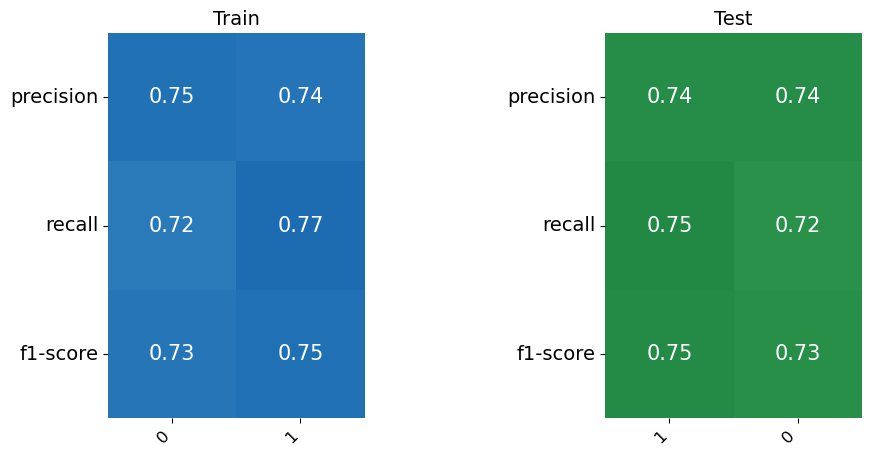


Classification Report train n_neighbors=23 :
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       394
           1       0.74      0.77      0.75       406

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

recall score train n_neighbors=23 :
0.7733990147783252

Classification Report test n_neighbors=23 :
              precision    recall  f1-score   support

           0       0.73      0.68      0.71        98
           1       0.71      0.75      0.73       102

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

recall score test n_neighbors=23 :
0.7549019607843137


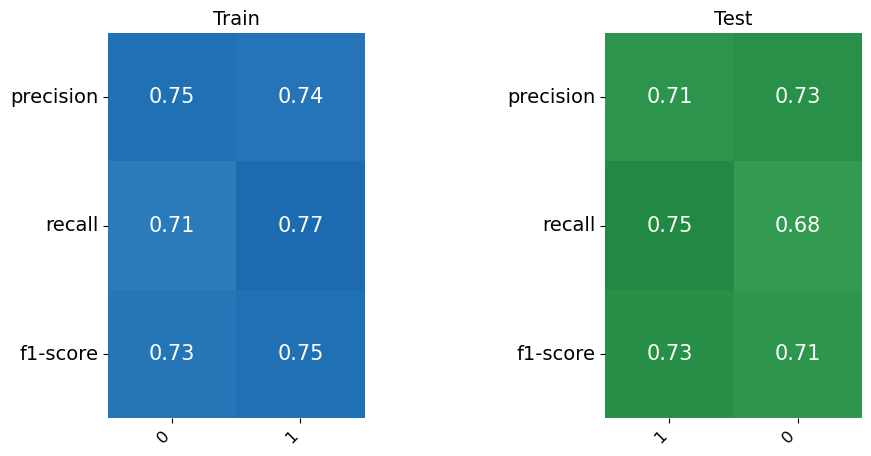


Classification Report train n_neighbors=25 :
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       394
           1       0.73      0.73      0.73       406

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800

recall score train n_neighbors=25 :
0.7339901477832512

Classification Report test n_neighbors=25 :
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        98
           1       0.70      0.73      0.71       102

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

recall score test n_neighbors=25 :
0.7254901960784313


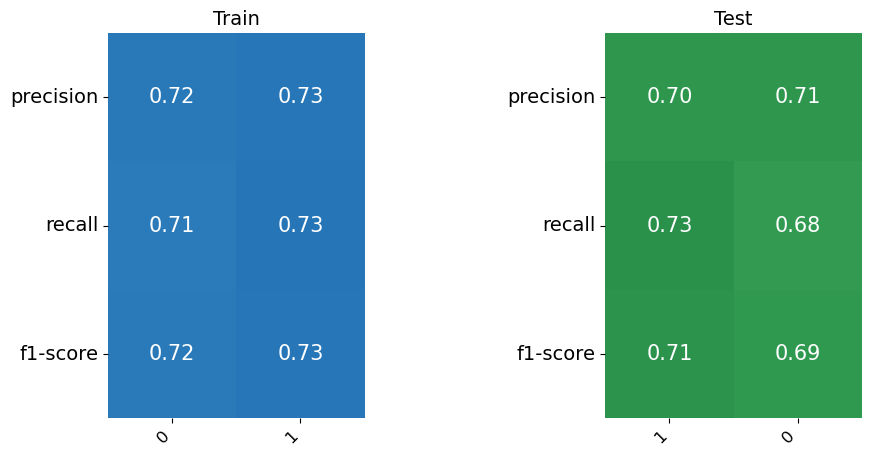


Classification Report train n_neighbors=27 :
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       394
           1       0.71      0.73      0.72       406

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800

recall score train n_neighbors=27 :
0.7315270935960592

Classification Report test n_neighbors=27 :
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        98
           1       0.65      0.71      0.68       102

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200

recall score test n_neighbors=27 :
0.7058823529411765


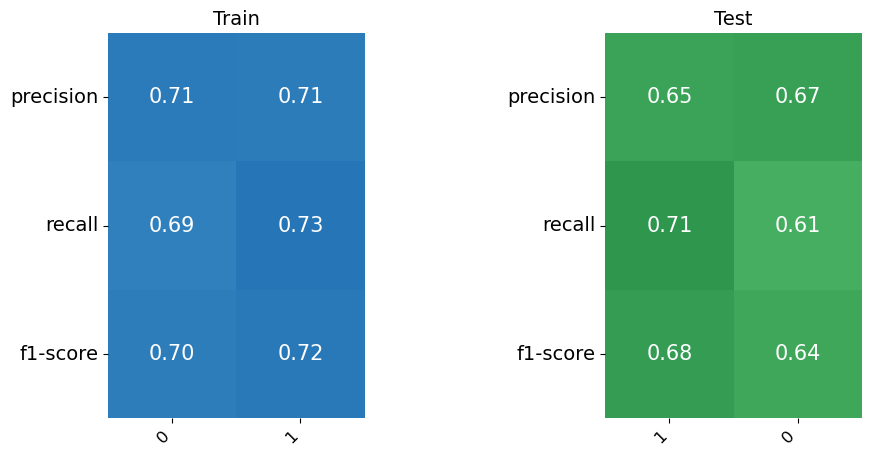


Classification Report train n_neighbors=29 :
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       394
           1       0.72      0.71      0.72       406

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800

recall score train n_neighbors=29 :
0.7142857142857143

Classification Report test n_neighbors=29 :
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        98
           1       0.65      0.67      0.66       102

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200

recall score test n_neighbors=29 :
0.6666666666666666


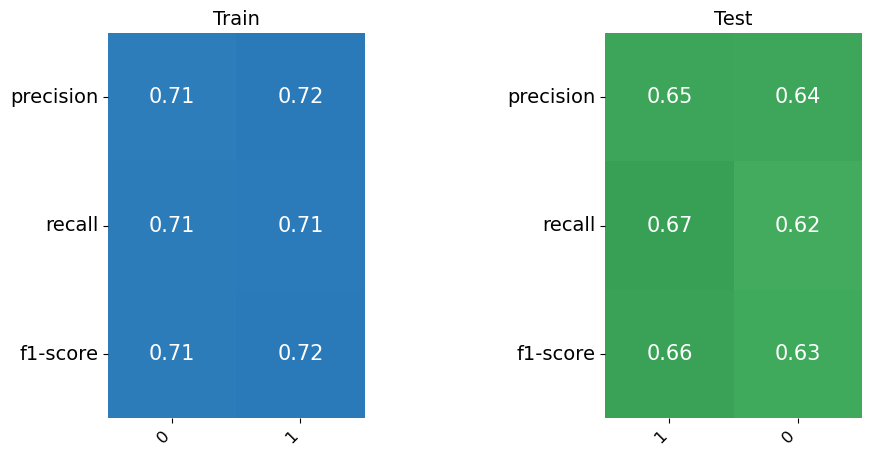


Classification Report train n_neighbors=31 :
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       394
           1       0.72      0.72      0.72       406

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800

recall score train n_neighbors=31 :
0.7192118226600985

Classification Report test n_neighbors=31 :
              precision    recall  f1-score   support

           0       0.67      0.64      0.66        98
           1       0.67      0.70      0.68       102

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200

recall score test n_neighbors=31 :
0.696078431372549


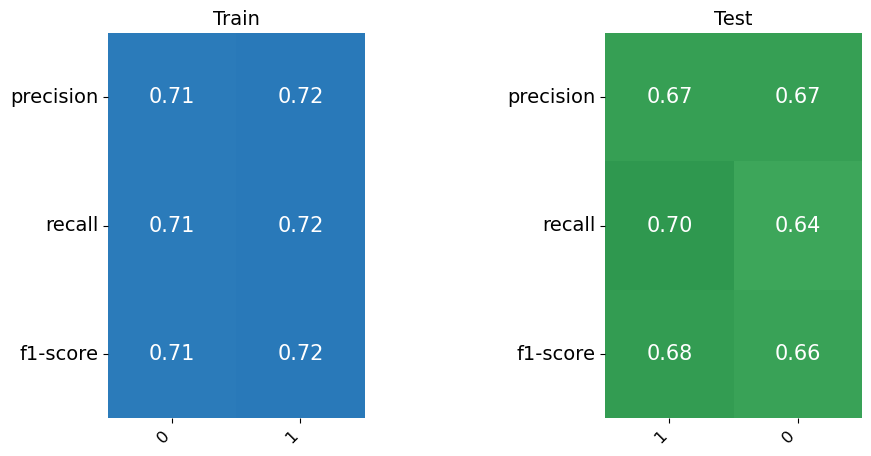


Classification Report train n_neighbors=33 :
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       394
           1       0.73      0.72      0.72       406

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800

recall score train n_neighbors=33 :
0.7192118226600985

Classification Report test n_neighbors=33 :
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        98
           1       0.68      0.72      0.70       102

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

recall score test n_neighbors=33 :
0.7156862745098039


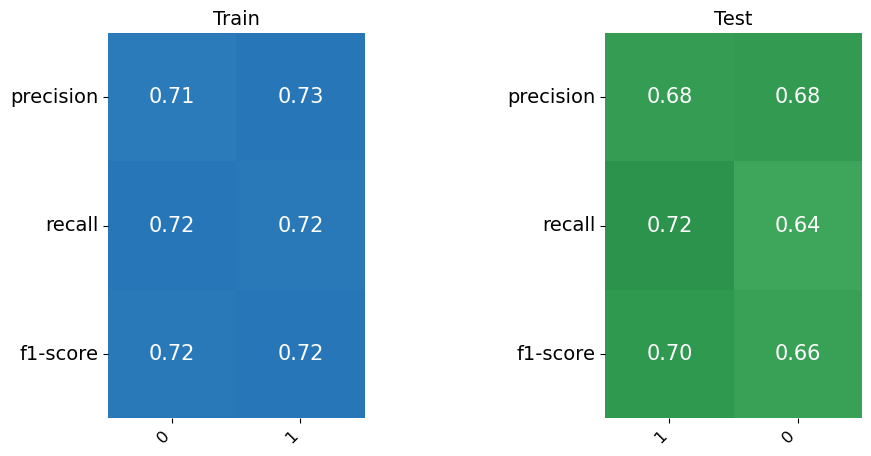



Nilai tertinggi recall train: 1.0 untuk n_neighbors=1
Nilai terendah train: 0.7142857142857143 untuk n_neighbors=29
Nilai tertinggi recall test: 0.9705882352941176 untuk n_neighbors=1
Nilai terendah recall test: 0.6666666666666666 untuk n_neighbors=29


In [ ]:
seed = 0

nilai_tertinggi_recall_train = -1
nilai_tertinggi_recall_class_train = None
nilai_terendah_recall_train = 2
nilai_terendah_recall_class_train = None

nilai_tertinggi_recall_test = -1
nilai_tertinggi_recall_class_test = None
nilai_terendah_recall_test = 2
nilai_terendah_recall_class_test = None


for i in range(1, 35, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    y_predict_train = knn.predict(x_train)
    y_predict_test = knn.predict(x_test)

    print(f"\nClassification Report train n_neighbors={i} :")
    print(classification_report(y_train, y_predict_train))
    print(f"recall score train n_neighbors={i} :")
    train_recall = recall_score(y_train, y_predict_train)
    print(train_recall)
    if train_recall > nilai_tertinggi_recall_train:
        nilai_tertinggi_recall_train = train_recall
        nilai_tertinggi_recall_class_train = f"n_neighbors={i}"
    if train_recall < nilai_terendah_recall_train:
        nilai_terendah_recall_train = train_recall
        nilai_terendah_recall_class_train = f"n_neighbors={i}"

    print(f"\nClassification Report test n_neighbors={i} :")
    print(classification_report(y_test, y_predict_test))
    print(f"recall score test n_neighbors={i} :")
    test_recall = recall_score(y_test, y_predict_test)
    print(test_recall)
    if test_recall > nilai_tertinggi_recall_test:
        nilai_tertinggi_recall_test = test_recall
        nilai_tertinggi_recall_class_test = f"n_neighbors={i}"
    if test_recall < nilai_terendah_recall_test:
        nilai_terendah_recall_test = test_recall
        nilai_terendah_recall_class_test = f"n_neighbors={i}"

    plot_classification_report(x_train, y_train, x_test, y_test, knn)
    plt.show()
    print("====================================================================================")
    print("====================================================================================")
    print("====================================================================================")
    print("====================================================================================")

print("\n")
print(f"Nilai tertinggi recall train: {nilai_tertinggi_recall_train} untuk {nilai_tertinggi_recall_class_train}")
print(f"Nilai terendah train: {nilai_terendah_recall_train} untuk {nilai_terendah_recall_class_train}")
print(f"Nilai tertinggi recall test: {nilai_tertinggi_recall_test} untuk {nilai_tertinggi_recall_class_test}")
print(f"Nilai terendah recall test: {nilai_terendah_recall_test} untuk {nilai_terendah_recall_class_test}")

pada kode diatas, saya melakukan split data train dan data test, saya juga melakukan looping dari 1 hingga 34 dengan langkah 2 untuk parameter n_neighbors, kemudian saya melatih modelnya kembali dengan patokan matriks evaluasi recall.
berdasarkan kode di atas,kita bisa melihat jikalau tetangga nya semakin banyak maka akan semakin rendah nilai recall nya baik itu dari segi train maupun test
mari kita lihat dari lerning curve nya

# Learning curve , parameter tunning dan cross validatin dari KNN train test split sebelumnya

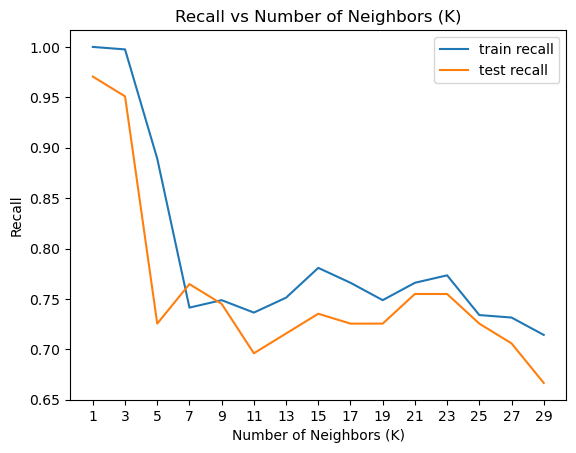

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    neighbor.append(k)

    y_pred_train = knn.predict(x_train)
    train_recall.append(recall_score(y_train, y_pred_train))

    y_pred_test = knn.predict(x_test)
    test_recall.append(recall_score(y_test, y_pred_test))

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("Recall vs Number of Neighbors (K)")
plt.show()

Pada learning curve untuk perbandingan train recall dan test recal terhadap n_neighbors di atas...yang paling bagus dilihat sekilas adalah ketika n_neighbors = 1 karena gap eror nya rendah dan skor recall nya tinggi..tapi saya ingin mengecek lagi di lerning curve ketika n_neighbors=1 dilakukan validasi silang.

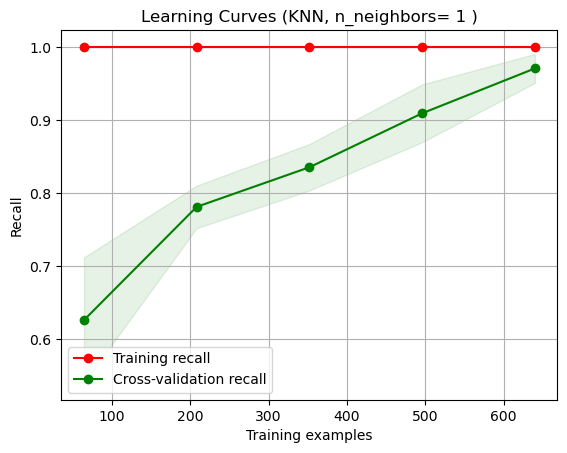

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt


knn_optimal = KNeighborsClassifier(n_neighbors=1)
title = f"Learning Curves (KNN, n_neighbors= 1 )"
plot_learning_curve(knn_optimal, title, x_train, y_train, n_jobs=-1, cv=5)

plt.show()

Pada lerning curve untuk perbandingan training recal dan cross-validation recall terhadap data latih di atas..nampak bahwa untuk n_neigbors=1 terjadi overfitting, bisa dilihat bahwa Ketika training recall tetap tinggi (dalam kasus ini, mencapai nilai maksimum 1), itu menunjukkan bahwa model memiliki kinerja yang sangat baik pada data pelatihan. Namun cross-validation recall yang naik secara perlahan secara konsisten dari awal data hingga akhir data menunjukkan bahwa model tidak dapat memgeneralisasi dengan baik pada data baru (data yang tidak terlihat selama pelatihan).

berdasarkan pernyataan saya di atas,dengan kata lain asumsi saya sebelumnya salah, yang berarti untuk analisis kedepannya saya akan secara aktif menggunakan 2 jenis learning curve agar penilaian model machine learning saya lebih tepat sasaran.

saya ingin melihat nilai scorr recal lain ketika hyperparameter n_neigbors saya tuning..saya ingin melihat gap error nya

In [ ]:
for i in range(1, 31, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    train_recall = recall_score(y_train, knn.predict(x_train))
    test_recall = recall_score(y_test, knn.predict(x_test))

    print(f"Train recall untuk n_neighbors = {i}: {train_recall}")
    print(f"Test recall untuk n_neighbors = {i}: {test_recall}")
    print(f"eror gap untuk n_neighbors = {i}: {train_recall-test_recall}")
    print("\n")

Train recall untuk n_neighbors = 1: 1.0
Test recall untuk n_neighbors = 1: 0.9705882352941176
eror gap untuk n_neighbors = 1: 0.02941176470588236


Train recall untuk n_neighbors = 3: 0.9975369458128078
Test recall untuk n_neighbors = 3: 0.9509803921568627
eror gap untuk n_neighbors = 3: 0.04655655365594513


Train recall untuk n_neighbors = 5: 0.8891625615763546
Test recall untuk n_neighbors = 5: 0.7254901960784313
eror gap untuk n_neighbors = 5: 0.1636723654979233


Train recall untuk n_neighbors = 7: 0.7413793103448276
Test recall untuk n_neighbors = 7: 0.7647058823529411
eror gap untuk n_neighbors = 7: -0.0233265720081135


Train recall untuk n_neighbors = 9: 0.7487684729064039
Test recall untuk n_neighbors = 9: 0.7450980392156863
eror gap untuk n_neighbors = 9: 0.0036704336907176227


Train recall untuk n_neighbors = 11: 0.7364532019704434
Test recall untuk n_neighbors = 11: 0.696078431372549
eror gap untuk n_neighbors = 11: 0.040374770597894405


Train recall untuk n_neighbors = 

Jika dilihat dari kode di atas..banyak yang gap error nya lebih kecil daripada n_neighbors=1, tapi train recall mereka rendah, sehingga meskipun ketika saya lihat learning curvenya, model ini masih akan jelek, tapi apa yang akan terjadi jika saya melihat yang mempunyai gap error besar seperti n_neighbors 5

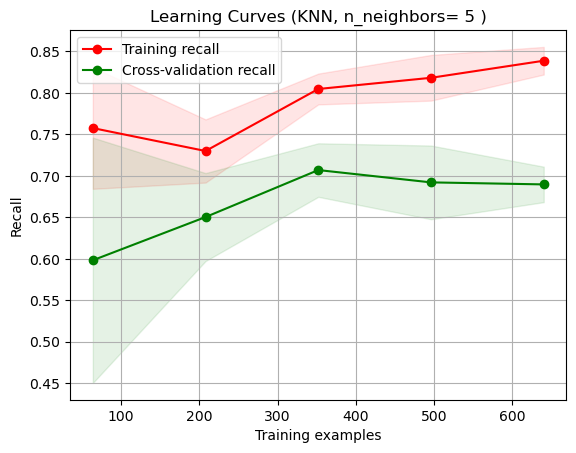

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt


knn_optimal = KNeighborsClassifier(n_neighbors=5)
title = f"Learning Curves (KNN, n_neighbors= 5 )"
plot_learning_curve(knn_optimal, title, x_train, y_train, n_jobs=-1, cv=5)

plt.show()

ternyata yang punya gap error lebih besar lebih bagus dalam model machine learning ini.

sekarang saya ingin melihat jika dataset ini dilakukan validasi silang secara menyeluruh

# KNN train test split dengan cross validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)

cross_val_train = cross_val_score(knn, x_train, y_train, cv=5, scoring="recall")
cross_val_test = cross_val_score(knn, x_test, y_test, cv=5, scoring="recall")

print(f"Nilai cross validation recall untuk data latih: {np.mean(cross_val_train)}")
print(f"Nilai cross validation recal untuk data uji: {np.mean(cross_val_test)}")

Nilai cross validation recall untuk data latih: 0.9705209274314963
Nilai cross validation recal untuk data uji: 0.6385714285714286


Dari hasil kodingan di atas...Nilai cross validation recall menunjukkan bahwa rata-rata recall dari model pada data latih adalah sekitar 97.05%. Ini berarti model secara umum memiliki kemampuan yang baik pada data latih, akan tetapi Nilai cross validation recall untuk data uji menunjukkan bahwa rata-rata recall dari model pada data uji adalah sekitar 63.85%, Ini berarti model memiliki kinerja yang rendah saat diterapkan pada data yang belum pernah dilihat sebelumnya..dengan kata lain terjadi overfitting, hal ini selaras dengan leraning curve pertama yang saya buat.

mari kita lihat hasil Nilai cross validation recall untuk data latih dan Nilai cross validation recal untuk data uji ketika n_neighbors nya kita tunning.

In [ ]:
for i in range(1, 31, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train, y_train)

    cross_val_train = cross_val_score(knn, x_train, y_train, cv=5, scoring="recall")
    cross_val_test = cross_val_score(knn, x_test, y_test, cv=5, scoring="recall")

    print(f"Nilai cross validation recall untuk data latih n_neighbors={i} : {cross_val_train.mean()}")
    print(f"Nilai cross validation recall untuk data uji n_neighbors={i} : {cross_val_test.mean()}")
    print("\n")

Nilai cross validation recall untuk data latih n_neighbors=1 : 0.9705209274314963
Nilai cross validation recall untuk data uji n_neighbors=1 : 0.6385714285714286


Nilai cross validation recall untuk data latih n_neighbors=3 : 0.790695573622403
Nilai cross validation recall untuk data uji n_neighbors=3 : 0.6880952380952381


Nilai cross validation recall untuk data latih n_neighbors=5 : 0.6896416741945197
Nilai cross validation recall untuk data uji n_neighbors=5 : 0.719047619047619


Nilai cross validation recall untuk data latih n_neighbors=7 : 0.694579945799458
Nilai cross validation recall untuk data uji n_neighbors=7 : 0.6790476190476191


Nilai cross validation recall untuk data latih n_neighbors=9 : 0.6894911171333934
Nilai cross validation recall untuk data uji n_neighbors=9 : 0.669047619047619


Nilai cross validation recall untuk data latih n_neighbors=11 : 0.7215898825654923
Nilai cross validation recall untuk data uji n_neighbors=11 : 0.6290476190476191


Nilai cross valida

hasil kodingan di atas bahkan lebih buruk daripada ketika n_neighbors=1

saya ingin melihat lerning curve untuk KNN cross validation

# Learning curve untuk KNN cross validation

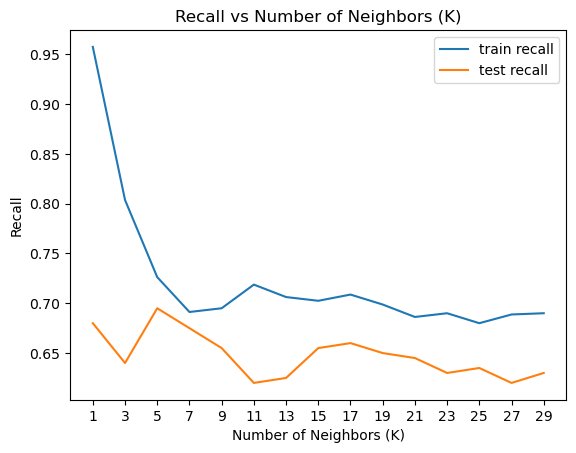

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for k in range(1, 31, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    recall_scorer = make_scorer(recall_score, average='weighted')
    cross_val_train = cross_val_score(knn, x_train, y_train, cv=5, scoring=recall_scorer)
    cross_val_test = cross_val_score(knn, x_test, y_test, cv=5, scoring=recall_scorer)

    neighbor.append(k)
    train_recall.append(cross_val_train.mean())
    test_recall.append(cross_val_test.mean())

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("Recall vs Number of Neighbors (K)")
plt.show()

saya sudah melakukan cros validation tetapi tetap underfit, untuk data test nilai recallnya tidak ada yang lebih dari 7.5, tapi setidaknya ini konstan di nilai test recalnya yaitu kisaran 70an persen..saya ingin melihat lerning curve ketika n_neighbors=5 karena di situ gap antara train recall dan test recalnya tidak terlalu jauh

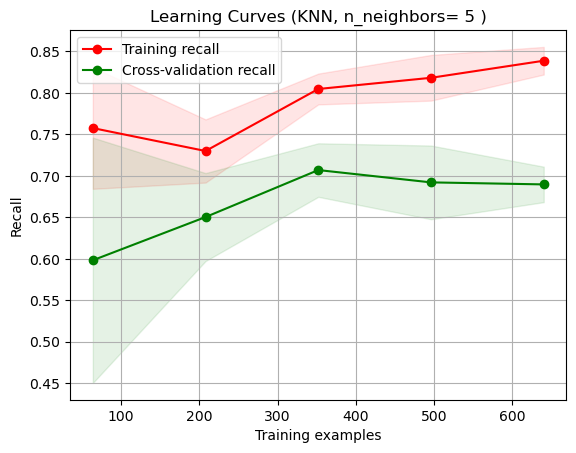

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="recall")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt

title = f"Learning Curves (KNN, n_neighbors= 5 )"
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), title, x_train, y_train, n_jobs=-1, cv=5)
plt.show()

ini adalah model yang sama seperti yang sempat saya buat learning curve nya sebelumnya

pada learning curve di atas..nampak bahwa training recall sempat mengalami penurunan di awal data training ke 200, tapi kembali naik karena sudah terbiasa, untuk data training yang sudah di cross validation mengalami kenaikan hingga pertengan data ke 300, hingaa akhirnya konstan di nilai recall sekitar akhir 60an persen..model ini masih tidak bisa dibilang bagus karena bagaimanapun nilai recalnnya masih sangat rendah

untuk itu saya ingin melakukan one hot encoding kepada model KNN selanjutnya untuk melihat pengaruhnya kepada model

# feature engginering one hot encoding

In [ ]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
995   59    1   1       140   221    0        1      164      1      0.0   
996   60    1   0       125   258    0        0      141      1      2.8   
997   47    1   0       110   275    0        0      118      1      1.0   
998   50    0   0       110   254    0        0      159      0      0.0   
999   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  kategori_umur  level_kolestrol  \
0        2   2     3       0              5                1   
1        0   0     3       0              5                1   
2        0   0     3       0              6                0   
3        2   1     3       0              6                1   
4        1   3     2       0              6                1   
..     ...  ..   ...     ...            ...              ...   
995      2   0     2       1              5                1   
996      1   1     3       0              6                1   
997      1   1     2       0              5                1   
998      2   0     2       1              5                1   
999      1   1     3       0              5                0   

     level_Blood_pressure  maximum_heart_rate  heart_rate_status  
0                       1                 168                  0  
1                       3                 167                  0  
2                       3                 150                  0  
3                       3                 159                  1  
4                       2                 158                  0  
..                    ...                 ...                ...  
995                     3                 161                  1  
996                     1                 160                  0  
997                     0                 173                  0  
998                     0                 170                  0  
999                     1                 166                  0  

[1000 rows x 19 columns]

In [ ]:
df_hot = pd.get_dummies(df, columns=["heart_rate_status","level_Blood_pressure",
   "level_kolestrol","kategori_umur","thal","ca","slope","exang","restecg","fbs","cp","sex"
   ])

In [ ]:
df_hot

age  trestbps  chol  thalach  oldpeak  target  maximum_heart_rate  \
0     52       125   212      168      1.0       0                 168   
1     53       140   203      155      3.1       0                 167   
2     70       145   174      125      2.6       0                 150   
3     61       148   203      161      0.0       0                 159   
4     62       138   294      106      1.9       0                 158   
..   ...       ...   ...      ...      ...     ...                 ...   
995   59       140   221      164      0.0       1                 161   
996   60       125   258      141      2.8       0                 160   
997   47       110   275      118      1.0       0                 173   
998   50       110   254      159      0.0       1                 170   
999   54       120   188      113      1.4       0                 166   

     heart_rate_status_0  heart_rate_status_1  level_Blood_pressure_0  ...  \
0                      1                    0                       0  ...   
1                      1                    0                       0  ...   
2                      1                    0                       0  ...   
3                      0                    1                       0  ...   
4                      1                    0                       0  ...   
..                   ...                  ...                     ...  ...   
995                    0                    1                       0  ...   
996                    1                    0                       0  ...   
997                    1                    0                       1  ...   
998                    1                    0                       1  ...   
999                    1                    0                       0  ...   

     restecg_1  restecg_2  fbs_0  fbs_1  cp_0  cp_1  cp_2  cp_3  sex_0  sex_1  
0            1          0      1      0     1     0     0     0      0      1  
1            0          0      0      1     1     0     0     0      0      1  
2            1          0      1      0     1     0     0     0      0      1  
3            1          0      1      0     1     0     0     0      0      1  
4            1          0      0      1     1     0     0     0      1      0  
..         ...        ...    ...    ...   ...   ...   ...   ...    ...    ...  
995          1          0      1      0     0     1     0     0      0      1  
996          0          0      1      0     1     0     0     0      0      1  
997          0          0      1      0     1     0     0     0      0      1  
998          0          0      1      0     1     0     0     0      1      0  
999          1          0      1      0     1     0     0     0      0      1  

[1000 rows x 42 columns]

# KNN train test split dengan data yang sudah di one hot encoding

In [ ]:
x_hot = df_hot.drop(["target"],axis=1)
y_hot = df_hot["target"]

nilai_tertinggi_recall_train = -1
nilai_tertinggi_recall_class_train = None
nilai_terendah_recall_train = 2
nilai_terendah_recall_class_train = None

nilai_tertinggi_recall_test = -1
nilai_tertinggi_recall_class_test = None
nilai_terendah_recall_test = 2
nilai_terendah_recall_class_test = None

x_train_hot, x_test_hot, y_train_hot, y_test_hot = train_test_split(x_hot, y_hot, test_size=0.2,
                                                                        stratify=y, random_state=seed)

for i in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_hot, y_train_hot)

    y_predict_train_hot = knn.predict(x_train_hot)
    y_predict_test_hot = knn.predict(x_test_hot)

    print(f"recall score train n_neighbors={i} :")
    train_recall = recall_score(y_train_hot, y_predict_train_hot)
    print(train_recall)
    if train_recall > nilai_tertinggi_recall_train:
        nilai_tertinggi_recall_train = train_recall
        nilai_tertinggi_recall_class_train = f"n_neighbors={i}"
    if train_recall < nilai_terendah_recall_train:
        nilai_terendah_recall_train = train_recall
        nilai_terendah_recall_class_train = f"n_neighbors={i}"

    print(f"recall score test n_neighbors={i} :")
    test_recall = recall_score(y_test_hot, y_predict_test_hot)
    print(test_recall)
    if test_recall > nilai_tertinggi_recall_test:
        nilai_tertinggi_recall_test = test_recall
        nilai_tertinggi_recall_class_test = f"n_neighbors={i}"
    if test_recall < nilai_terendah_recall_test:
        nilai_terendah_recall_test = test_recall
        nilai_terendah_recall_class_test = f"n_neighbors={i}"
    print("\n")

print(f"Nilai tertinggi recall train: {nilai_tertinggi_recall_train} untuk {nilai_tertinggi_recall_class_train}")
print(f"Nilai terendah train: {nilai_terendah_recall_train} untuk {nilai_terendah_recall_class_train}")
print(f"Nilai tertinggi recall test: {nilai_tertinggi_recall_test} untuk {nilai_tertinggi_recall_class_test}")
print(f"Nilai terendah recall test: {nilai_terendah_recall_test} untuk {nilai_terendah_recall_class_test}")

recall score train n_neighbors=1 :
1.0
recall score test n_neighbors=1 :
0.9705882352941176


recall score train n_neighbors=3 :
0.9975369458128078
recall score test n_neighbors=3 :
0.9509803921568627


recall score train n_neighbors=5 :
0.8891625615763546
recall score test n_neighbors=5 :
0.7254901960784313


recall score train n_neighbors=7 :
0.7438423645320197
recall score test n_neighbors=7 :
0.7450980392156863


recall score train n_neighbors=9 :
0.7512315270935961
recall score test n_neighbors=9 :
0.7254901960784313


recall score train n_neighbors=11 :
0.7364532019704434
recall score test n_neighbors=11 :
0.696078431372549


recall score train n_neighbors=13 :
0.7438423645320197
recall score test n_neighbors=13 :
0.7156862745098039


recall score train n_neighbors=15 :
0.7733990147783252
recall score test n_neighbors=15 :
0.7352941176470589


recall score train n_neighbors=17 :
0.7586206896551724
recall score test n_neighbors=17 :
0.7254901960784313


recall score train n_neighb

# Learning curve dan parameter tunning dari KNN train test split yang sudah di one hot encoding

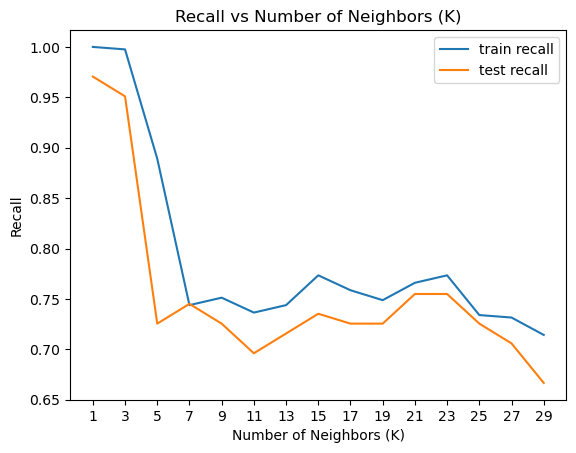

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for i in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_hot, y_train_hot)

    neighbor.append(i)

    y_pred_train = knn.predict(x_train_hot)
    train_recall.append(recall_score(y_train_hot, y_pred_train))

    y_pred_test = knn.predict(x_test_hot)
    test_recall.append(recall_score(y_test_hot, y_pred_test))

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("Recall vs Number of Neighbors (K)")
plt.show()

tetap underfit..dan juga learning curve ini 11/12 dengan learning curve ketika data tidak di one hot encoding sebelumnya..untuk itu saya ingin melihat jika data yang sudah di one hot encoding ini apakah akan membaik jika di cross validation

# KNN train test split yang sudah di one hot encoding dengan cross validation

In [ ]:
recall_scorer = make_scorer(recall_score, average='weighted')

for i in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train_hot, y_train_hot)

    cross_val_train = cross_val_score(knn, x_train_hot, y_train_hot, cv=5, scoring=recall_scorer)
    cross_val_test = cross_val_score(knn, x_test, y_test, cv=5, scoring=recall_scorer)

    print(f"Nilai cross validation recall untuk data latih n_neighbors={i} : {cross_val_train.mean()}")
    print(f"Nilai cross validation recall untuk data uji n_neighbors={i} : {cross_val_test.mean()}")
    print("\n")

Nilai cross validation recall untuk data latih n_neighbors=1 : 0.9575000000000001
Nilai cross validation recall untuk data uji n_neighbors=1 : 0.6799999999999999


Nilai cross validation recall untuk data latih n_neighbors=3 : 0.805
Nilai cross validation recall untuk data uji n_neighbors=3 : 0.6399999999999999


Nilai cross validation recall untuk data latih n_neighbors=5 : 0.7275
Nilai cross validation recall untuk data uji n_neighbors=5 : 0.695


Nilai cross validation recall untuk data latih n_neighbors=7 : 0.69375
Nilai cross validation recall untuk data uji n_neighbors=7 : 0.675


Nilai cross validation recall untuk data latih n_neighbors=9 : 0.68875
Nilai cross validation recall untuk data uji n_neighbors=9 : 0.655


Nilai cross validation recall untuk data latih n_neighbors=11 : 0.7137500000000001
Nilai cross validation recall untuk data uji n_neighbors=11 : 0.6199999999999999


Nilai cross validation recall untuk data latih n_neighbors=13 : 0.7025
Nilai cross validation recall

model ini juga sama jeleknya dengan model sebelumnya

# Learning curve untuk KNN cross validation yang sudah di one hot encoding

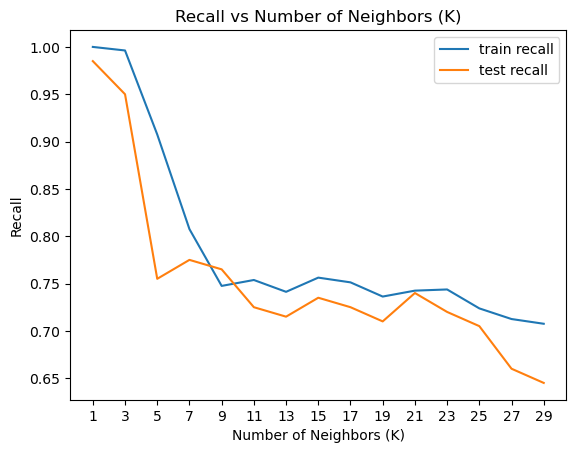

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_hot, y_train_hot)

    y_pred_train = knn.predict(x_train_hot)
    y_pred_test = knn.predict(x_test_hot)

    train_recall.append(recall_score(y_train_hot, y_pred_train, average='weighted'))
    test_recall.append(recall_score(y_test_hot, y_pred_test, average='weighted'))
    neighbor.append(k)

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("Recall vs Number of Neighbors (K)")
plt.show()

tetap underfit sama seperti model sebelumnya

sekarang saya ingin melihat jika data sebelumnya kita min max scaler

# feature engginering min max scaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_scaled, y_train)

y_pred_train = knn.predict(x_train_scaled)
y_pred_test = knn.predict(x_test_scaled)

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print("Recall score untuk data latih:", recall_train)
print("Recall score untuk data uji:", recall_test)

Recall score untuk data latih: 1.0
Recall score untuk data uji: 1.0


pada kodingan di atas..saya melakukan min max scaled pada data asli sebelum di one hot encoding, mari selanjutnya kita split datanya

# KNN train test split dengan data yang sudah di min max scaller

In [ ]:
nilai_tertinggi_recall_train = -1
nilai_tertinggi_recall_class_train = None
nilai_terendah_recall_train = 2
nilai_terendah_recall_class_train = None

nilai_tertinggi_recall_test = -1
nilai_tertinggi_recall_class_test = None
nilai_terendah_recall_test = 2
nilai_terendah_recall_class_test = None

for i in range(1, 31, 2):
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)

    y_pred_train = knn.predict(x_train_scaled)
    y_pred_test = knn.predict(x_test_scaled)

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    print(f"\nClassification Report train n_neighbors={i} :")
    print(classification_report(y_train, y_pred_train))
    print(f"recall score train n_neighbors={i} :")
    print(recall_train)
    if recall_train > nilai_tertinggi_recall_train:
        nilai_tertinggi_recall_train = recall_train
        nilai_tertinggi_recall_class_train = f"n_neighbors={i}"
    if recall_train < nilai_terendah_recall_train:
        nilai_terendah_recall_train = recall_train
        nilai_terendah_recall_class_train = f"n_neighbors={i}"

    print(f"\nClassification Report test n_neighbors={i} :")
    print(classification_report(y_test, y_pred_test))
    print(f"recall score test n_neighbors={i} :")
    print(recall_test)
    if recall_test > nilai_tertinggi_recall_test:
        nilai_tertinggi_recall_test = recall_test
        nilai_tertinggi_recall_class_test = f"n_neighbors={i}"
    if recall_test < nilai_terendah_recall_test:
        nilai_terendah_recall_test = recall_test
        nilai_terendah_recall_class_test = f"n_neighbors={i}"

    print("====================================================================================")
    print("====================================================================================")
    print("====================================================================================")
    print("====================================================================================")

print("\n")
print(f"Nilai tertinggi recall train: {nilai_tertinggi_recall_train} untuk {nilai_tertinggi_recall_class_train}")
print(f"Nilai terendah train: {nilai_terendah_recall_train} untuk {nilai_terendah_recall_class_train}")
print(f"Nilai tertinggi recall test: {nilai_tertinggi_recall_test} untuk {nilai_tertinggi_recall_class_test}")
print(f"Nilai terendah recall test: {nilai_terendah_recall_test} untuk {nilai_terendah_recall_class_test}")



Classification Report train n_neighbors=1 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

recall score train n_neighbors=1 :
1.0

Classification Report test n_neighbors=1 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

recall score test n_neighbors=1 :
1.0

Classification Report train n_neighbors=3 :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       394
           1       1.00   


Classification Report train n_neighbors=17 :
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       394
           1       0.82      0.85      0.83       406

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800

recall score train n_neighbors=17 :
0.82625

Classification Report test n_neighbors=17 :
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        98
           1       0.83      0.87      0.85       102

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

recall score test n_neighbors=17 :
0.845

Classification Report train n_neighbors=19 :
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       394
           1   

ketika kita melakukan min max scaler pada dataset kita..nilai recalnya naik baik dari segi data train maupun data test, tidak seperti sebelumnya yang konstan nilainya di sekita 60an persen pada model biasa dan sekitana 70an persen pada model yang sudah di one hot encoding, pada min max scalar ini semakin banyak n_neighborsnya, maka kelamaan akan konstan di nilai recall 80an persen untuk nilai recall train maupun recall test

mari kita lihat learning curvenya

# Learning curve untuk KNN dengan cross validation pada data yang sudah di min max scalling

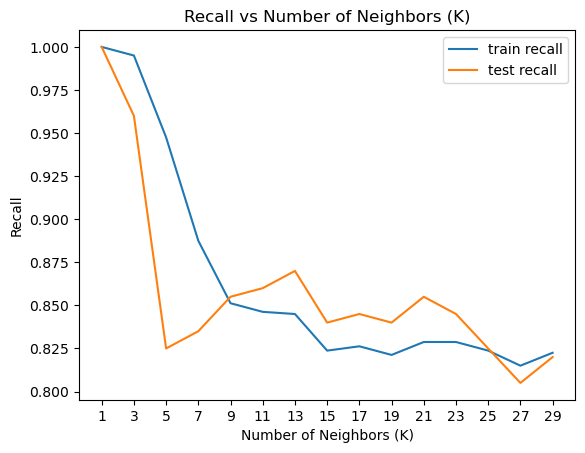

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for k in range(1, 31, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    y_pred_train = knn.predict(x_train_scaled)
    y_pred_test = knn.predict(x_test_scaled)

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    neighbor.append(k)
    train_recall.append(recall_train)
    test_recall.append(recall_test)

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("Recall vs Number of Neighbors (K)")
plt.show()


setidaknya persentase nilai recallnya naik..mari kita validasi silang dan lihat learning curve lainnya yang sudah di validasi silang.

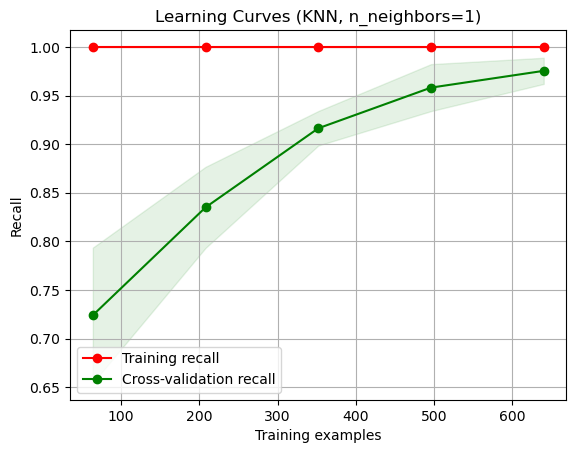

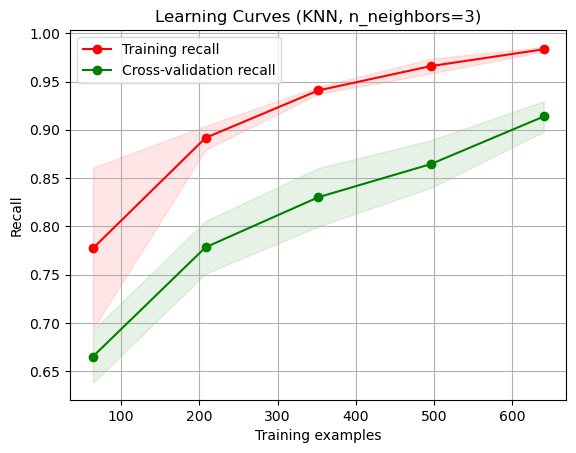

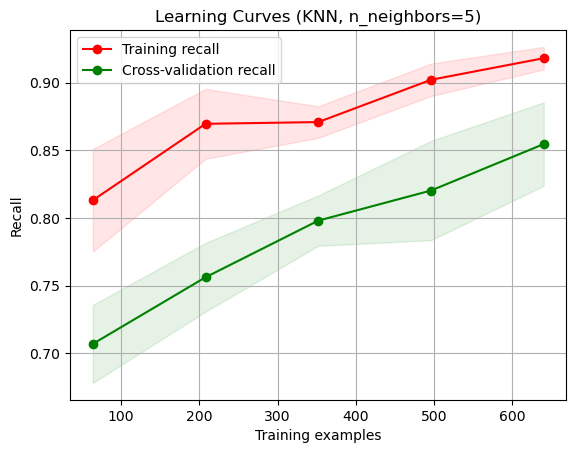

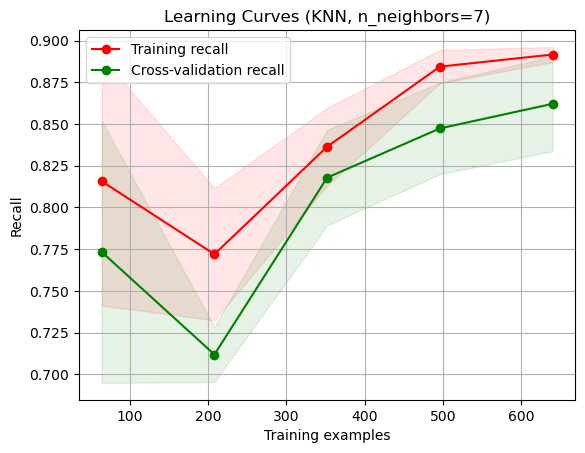

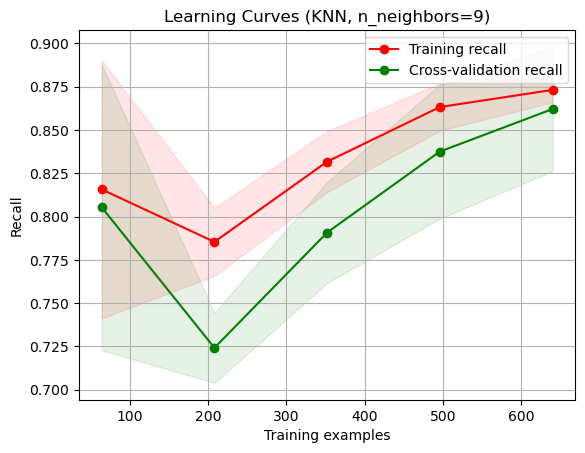

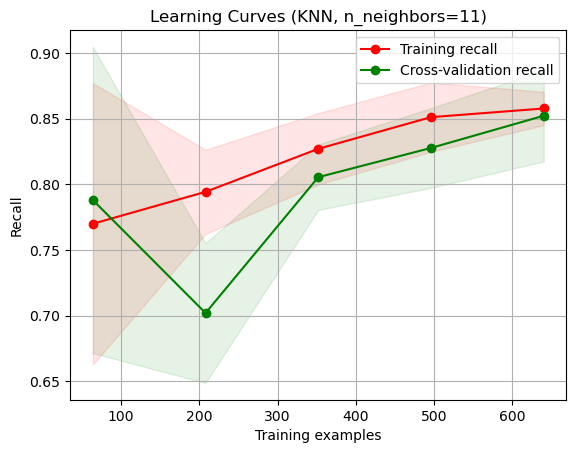

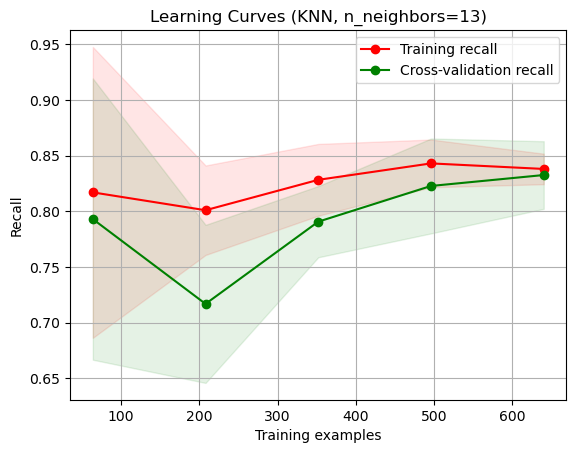

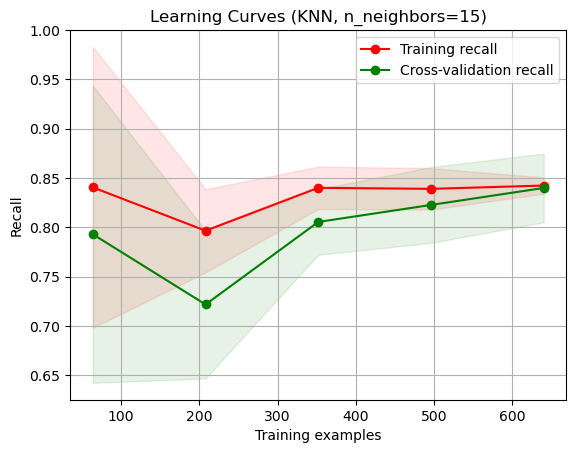

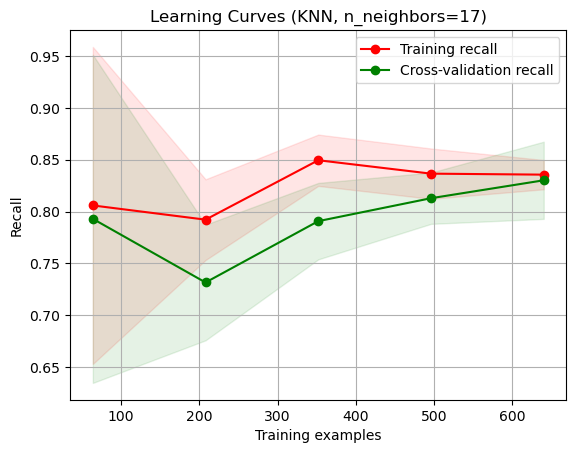

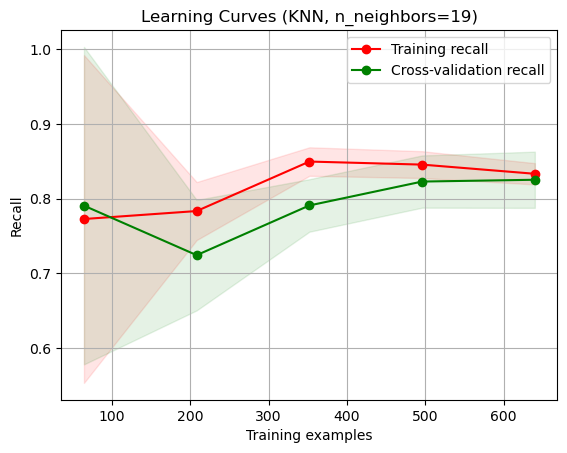

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_scaled, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt

for i in range(1,21,2):
    knn_optimal = KNeighborsClassifier(n_neighbors=i)
    title = f"Learning Curves (KNN, n_neighbors={i})"
    plot_learning_curve(knn_optimal, title, x_train, y_train, n_jobs=-1, cv=5)

plt.show()

yang terbaik sejauh ini jika dilihat sekilas adalah ketika n_neighbors=5

# featrue enginering standarisasi

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train_scaled, y_train)

y_pred_train = knn.predict(x_train_scaled)
y_pred_test = knn.predict(x_test_scaled)

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print("Recall score untuk data latih:", recall_train)
print("Recall score untuk data uji:", recall_test)

Recall score untuk data latih: 0.85
Recall score untuk data uji: 0.83


# KNN train test split dengan data yang sudah di standarisasi

In [ ]:
x = df.drop(["target"], axis=1)
y = df["target"]

nilai_tertinggi_recall_train = -1
nilai_tertinggi_recall_class_train = None
nilai_terendah_recall_train = 2
nilai_terendah_recall_class_train = None

nilai_tertinggi_recall_test = -1
nilai_tertinggi_recall_class_test = None
nilai_terendah_recall_test = 2
nilai_terendah_recall_class_test = None

for i in range(1, 31, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)

    y_pred_train = knn.predict(x_train_scaled)
    y_pred_test = knn.predict(x_test_scaled)

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    print(f"\nClassification Report train n_neighbors={i} :")
    print(classification_report(y_train, y_pred_train))
    print(f"recall score train n_neighbors={i} :")
    print(recall_train)
    if recall_train > nilai_tertinggi_recall_train:
        nilai_tertinggi_recall_train = recall_train
        nilai_tertinggi_recall_class_train = f"n_neighbors={i}"
    if recall_train < nilai_terendah_recall_train:
        nilai_terendah_recall_train = recall_train
        nilai_terendah_recall_class_train = f"n_neighbors={i}"

    print(f"\nClassification Report test n_neighbors={i} :")
    print(classification_report(y_test, y_pred_test))
    print(f"recall score test n_neighbors={i} :")
    print(recall_test)
    if recall_test > nilai_tertinggi_recall_test:
        nilai_tertinggi_recall_test = recall_test
        nilai_tertinggi_recall_class_test = f"n_neighbors={i}"
    if recall_test < nilai_terendah_recall_test:
        nilai_terendah_recall_test = recall_test
        nilai_terendah_recall_class_test = f"n_neighbors={i}"

    print("====================================================================================")
    print("====================================================================================")
    print("====================================================================================")
    print("====================================================================================")

print("\n")
print(f"Nilai tertinggi recall train: {nilai_tertinggi_recall_train} untuk {nilai_tertinggi_recall_class_train}")
print(f"Nilai terendah train: {nilai_terendah_recall_train} untuk {nilai_terendah_recall_class_train}")
print(f"Nilai tertinggi recall test: {nilai_tertinggi_recall_test} untuk {nilai_tertinggi_recall_class_test}")
print(f"Nilai terendah recall test: {nilai_terendah_recall_test} untuk {nilai_terendah_recall_class_test}")



Classification Report train n_neighbors=1 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

recall score train n_neighbors=1 :
1.0

Classification Report test n_neighbors=1 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

recall score test n_neighbors=1 :
1.0

Classification Report train n_neighbors=3 :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       394
           1       1.00   


Classification Report train n_neighbors=17 :
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       394
           1       0.82      0.84      0.83       406

    accuracy                           0.82       800
   macro avg       0.83      0.82      0.82       800
weighted avg       0.83      0.82      0.82       800

recall score train n_neighbors=17 :
0.825

Classification Report test n_neighbors=17 :
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.80      0.87      0.84       102

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

recall score test n_neighbors=17 :
0.825

Classification Report train n_neighbors=19 :
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       394
           1     

# Learning curve untuk KNN dengan cross validation pada data yang sudah di standarisasi

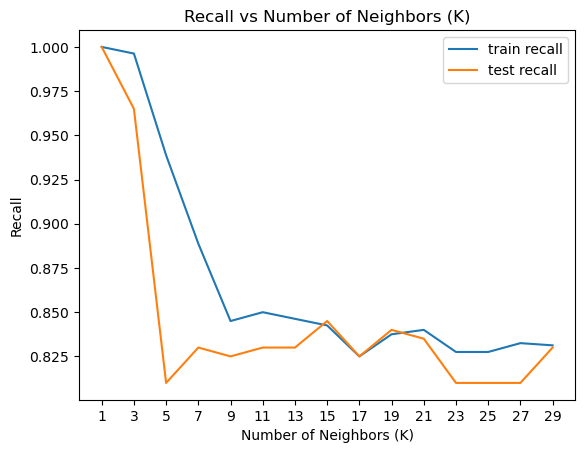

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for k in range(1, 31, 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    y_pred_train = knn.predict(x_train_scaled)
    y_pred_test = knn.predict(x_test_scaled)

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    neighbor.append(k)
    train_recall.append(recall_train)
    test_recall.append(recall_test)

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall")
plt.title("Recall vs Number of Neighbors (K)")
plt.show()

sedikit sama dengan min max scaler..hal ini mungkin bisa mengindikasikan bahwa feature engginering apapun yang kita lakukan, model KNN untuk dataset ini tidak akan menghasilkan lebih dari 85an persen untuk data trainnya, tapi setidaknya untuk standarisasi ini, model test recalnya tidak banyak yang melebihi nilai train recalnya

selanjutnya saya memutuskan akan memakai dataset yang di standarisasi untuk melakukan hyperparameter tunning dengan gridsearch cv, di sini saya hanya akan mentunning bagian n_neighborsnya saja untuk mengetahui yang mana yang paling bagus.

In [ ]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": range(1,21,2),
              }

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)
best_knn = grid_search.best_estimator_

In [ ]:
best_knn

KNeighborsClassifier(n_neighbors=1)

hasil di atas sudah bisa ditebak...tapi itu tidak membuat kemungkinan overfitting tidak terjadi seperti nampak pada learning curve sebelumnya, mari kita lihat learning curvenya kembali

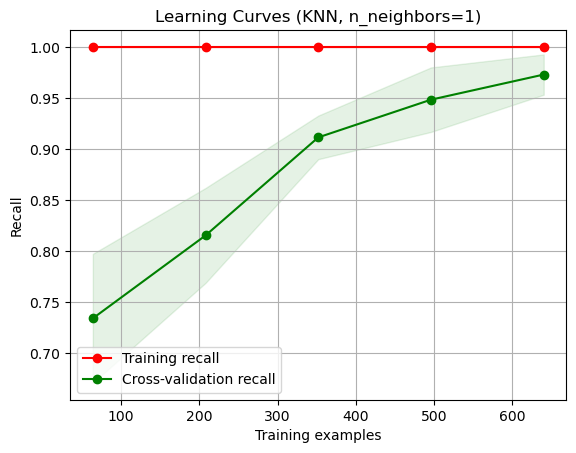

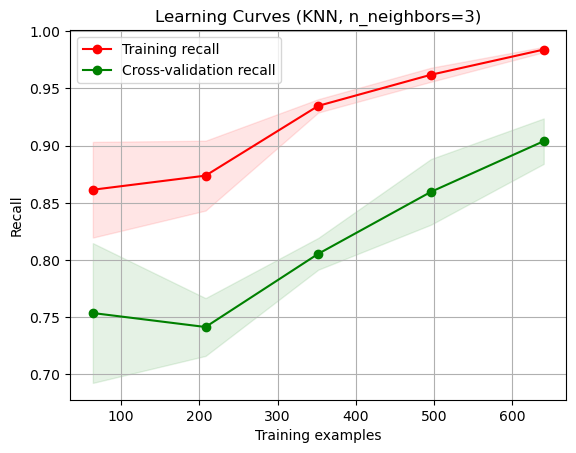

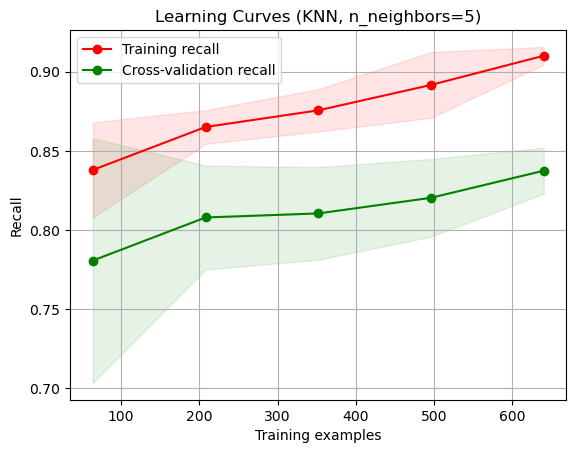

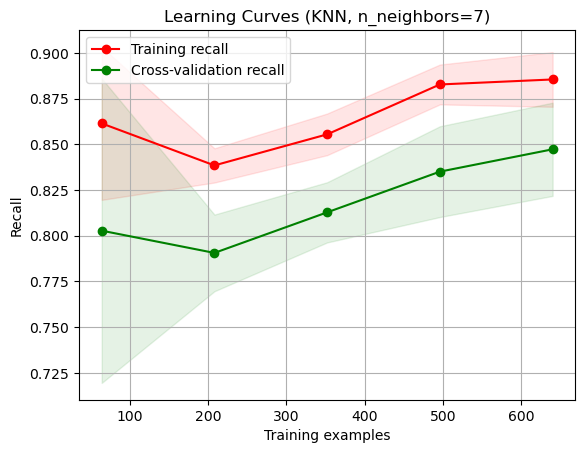

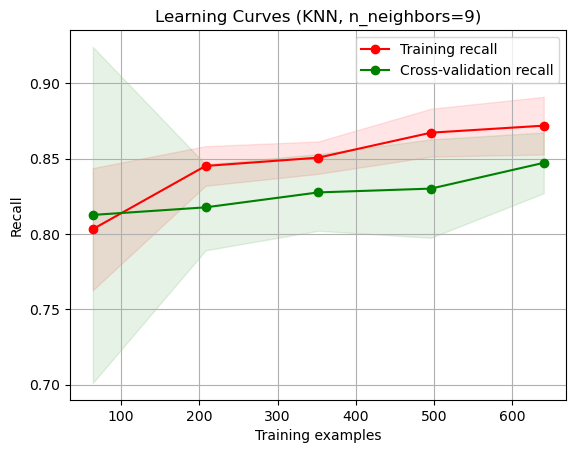

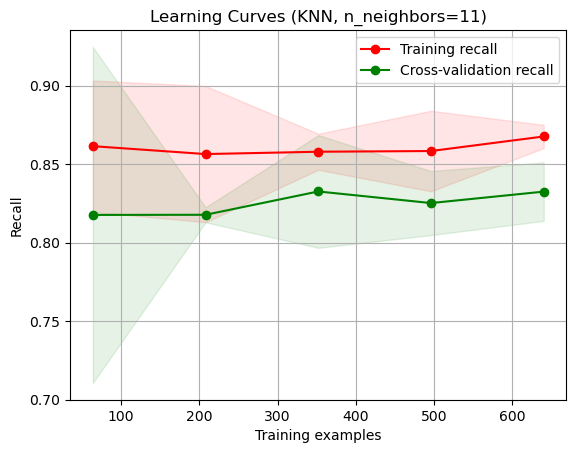

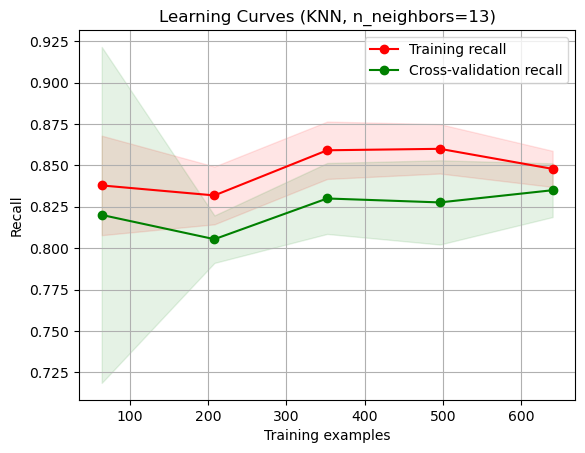

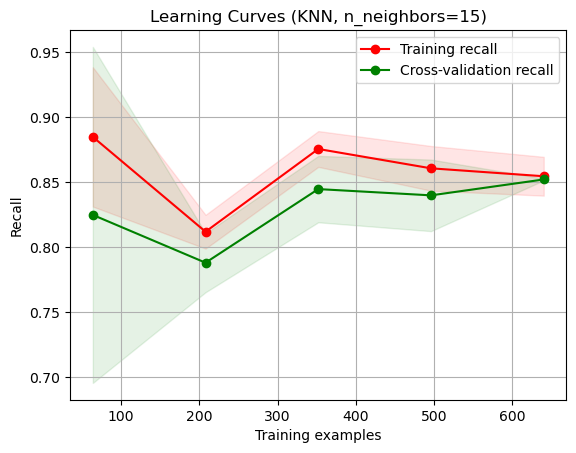

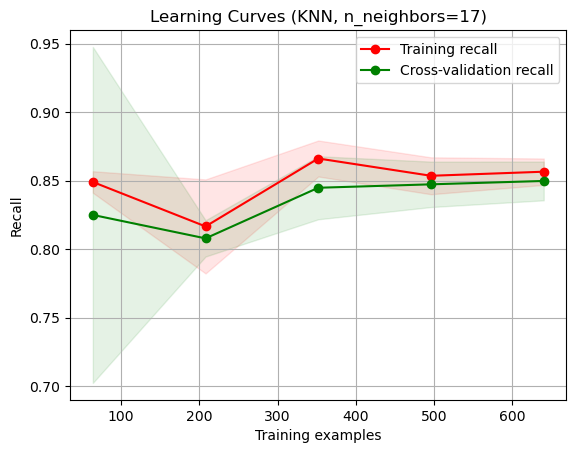

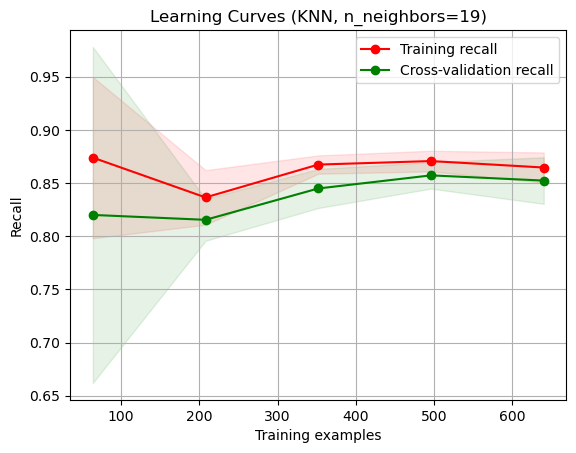

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_scaled, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt

for i in range(1,21,2):
    knn_optimal = KNeighborsClassifier(n_neighbors=i)
    title = f"Learning Curves (KNN, n_neighbors={i})"
    plot_learning_curve(knn_optimal, title, x_train_scaled, y_train, n_jobs=-1, cv=5)

plt.show()

dari kedua learning curve..yang paling bagus menunjukkan keadaan ketika n_neighbors=11, di sini nilai training recall nya cendrung konstan dari awal data hingga akhir data begitu juga untuk cross validation recall.

dengan ini saya mengambil kesimpulan bahwa dari semua model, model dengan n_neighbors=11 dengan data di standariasi lah yang paling bagus.

# **Random forest**

---

Alasan saya menggunakan randomforest untuk model machine learning ini adalah sebagai berikut :
1. Kemampuan randomforest untuk menangani data yang tidak seimbang secara alami, apalagi untuk kasus penyakit jantung di mana jumlah sampel positif dan negatif mungkin tidak seimbang
2. kemampuan random forest untuk menangani fitur yang berkorelasi dimana dalam kasus medis seperti penyakit jantung beberapa fitur saling berkorelasi
3. Kemampuan randomforest untuk mengatasi overfitting dimana random forest memiliki kemampuan bawaan untuk mengurangi overfitting

# Random forrest train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

rf = RandomForestClassifier(random_state=seed,max_depth=1)

rf.fit(x_train, y_train)

y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

recall_test = recall_score(y_test, y_pred_test)
print("recall test model Random Forest:", recall_test)
recall_train = recall_score(y_train, y_pred_train)
print("recall train model Random Forest:", recall_train)

print(f"score test {accuracy_score(y_test, y_pred_test)}")
print(f"score train {accuracy_score(y_train, y_pred_train)}")

recall test model Random Forest: 0.86
recall train model Random Forest: 0.9044117647058824
score test 0.82
score train 0.855


# random forest parameter tunning max_deepth

In [ ]:
for i in range(1,20,1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    rf = RandomForestClassifier(random_state=seed,max_depth=i)

    rf.fit(x_train, y_train)

    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)

    recall_test = recall_score(y_test, y_pred_test)
    print(f"recall test model Random Forest max_depth={i} :", recall_test)

    recall_train = recall_score(y_train, y_pred_train)
    print(f"recall train model Random Forest max_depth={i} :", recall_train)

recall test model Random Forest max_depth=1 : 0.86
recall train model Random Forest max_depth=1 : 0.9044117647058824
recall test model Random Forest max_depth=2 : 0.88
recall train model Random Forest max_depth=2 : 0.9166666666666666
recall test model Random Forest max_depth=3 : 0.87
recall train model Random Forest max_depth=3 : 0.9264705882352942
recall test model Random Forest max_depth=4 : 0.92
recall train model Random Forest max_depth=4 : 0.9534313725490197
recall test model Random Forest max_depth=5 : 0.95
recall train model Random Forest max_depth=5 : 0.9681372549019608
recall test model Random Forest max_depth=6 : 1.0
recall train model Random Forest max_depth=6 : 0.9926470588235294
recall test model Random Forest max_depth=7 : 1.0
recall train model Random Forest max_depth=7 : 1.0
recall test model Random Forest max_depth=8 : 1.0
recall train model Random Forest max_depth=8 : 1.0
recall test model Random Forest max_depth=9 : 1.0
recall train model Random Forest max_depth=9 : 

Pada randomforest..semakin banyak max_depth, maka gap errornya akan semakin kecil hingga mendekati 0, ini bisa menjadi tanda bahwa semakin banyak max_depth nya maka akan semakin overfitting, mari kita lihat kedua model learning curvenya.

# learning curve random forest parameter tunning max_deepth dan cross validation

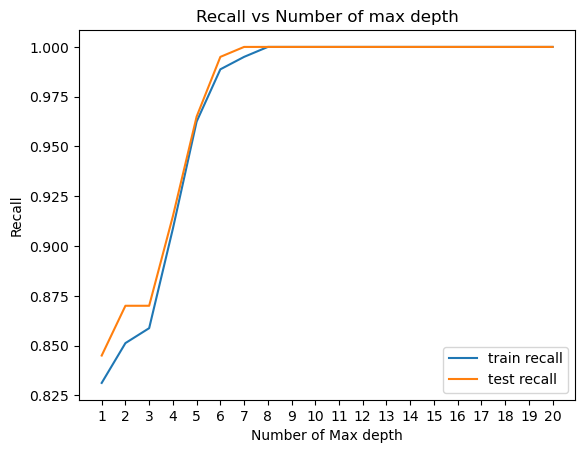

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for i in range(1, 21, 1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
    rf = RandomForestClassifier(random_state=seed,max_depth=i)
    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    y_pred_test = rf.predict(x_test)

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    neighbor.append(i)
    train_recall.append(recall_train)
    test_recall.append(recall_test)

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 21, 1))
plt.legend()
plt.xlabel("Number of Max depth")
plt.ylabel("Recall")
plt.title("Recall vs Number of max depth")
plt.show()

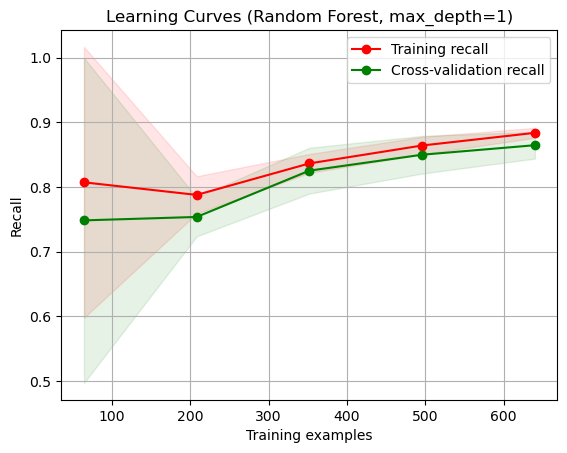

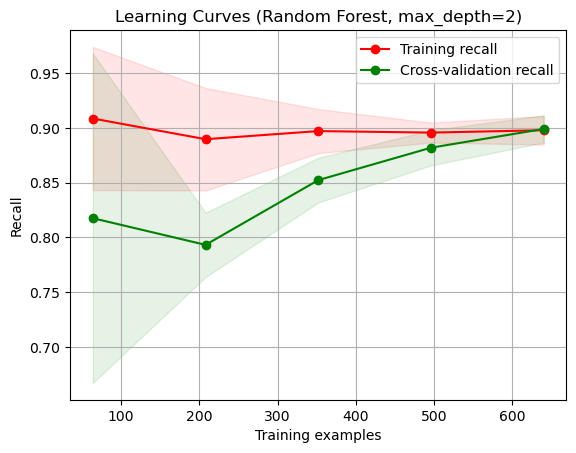

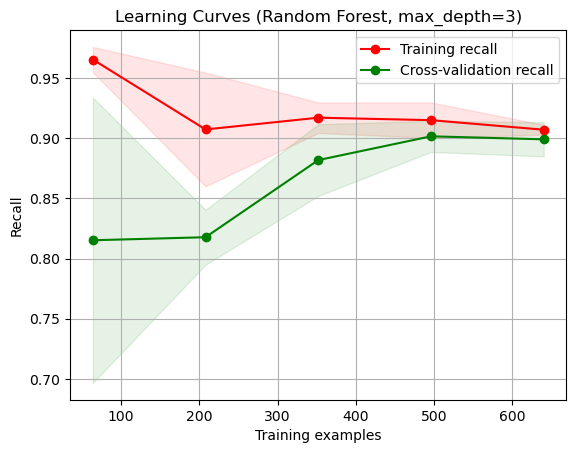

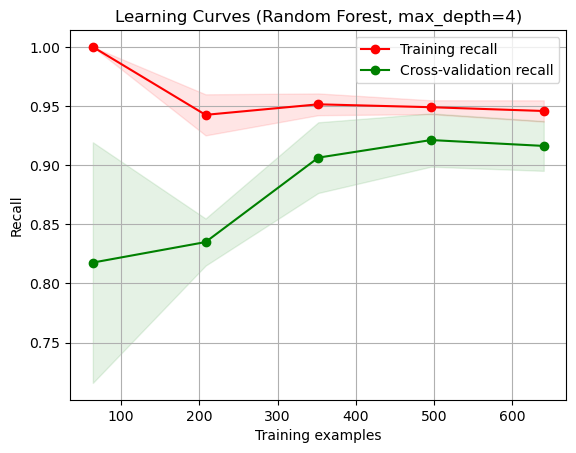

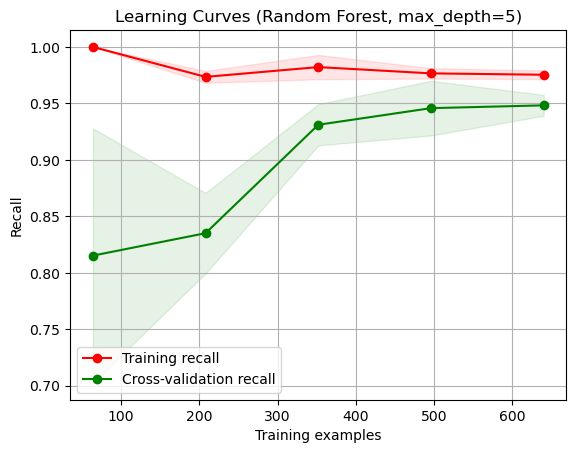

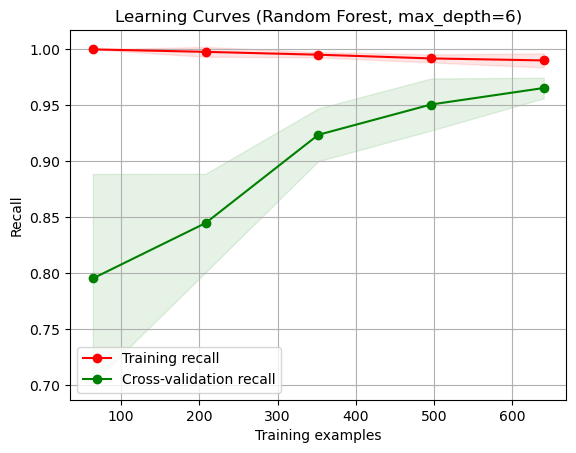

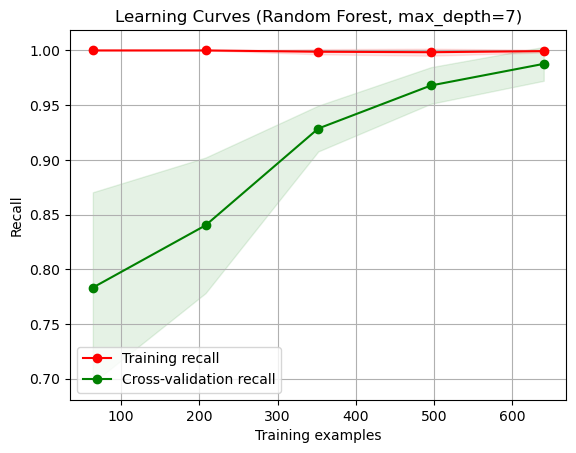

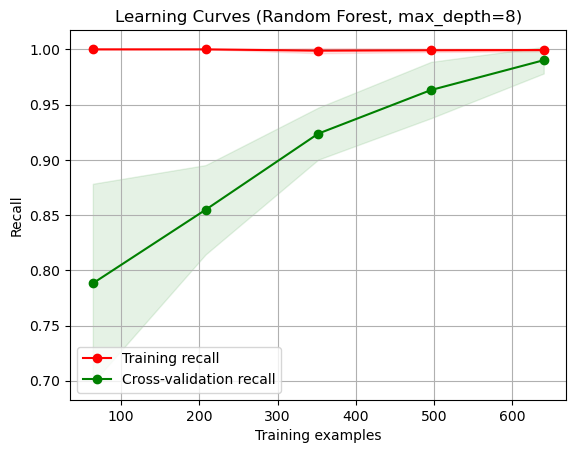

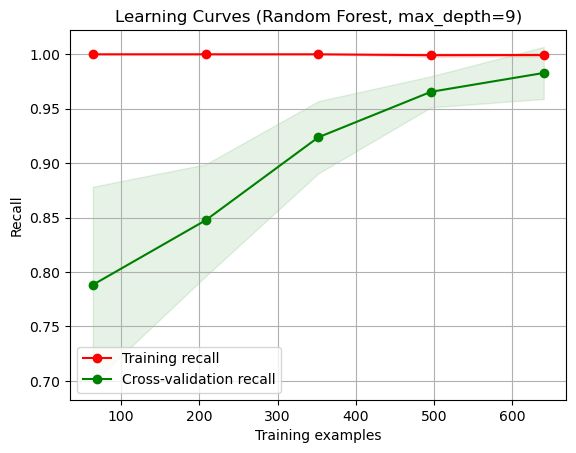

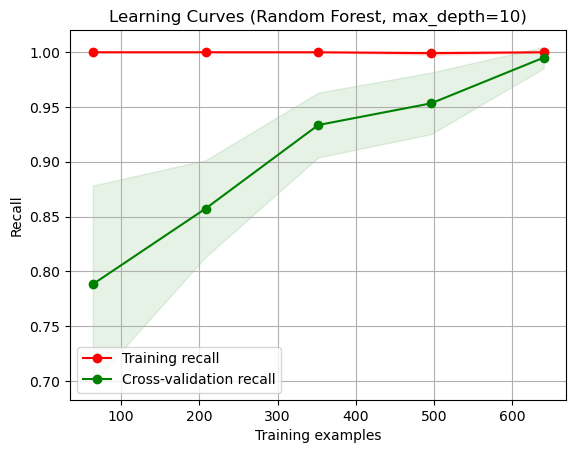

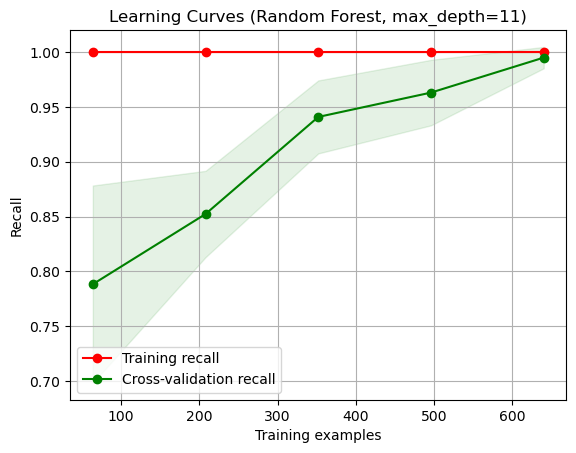

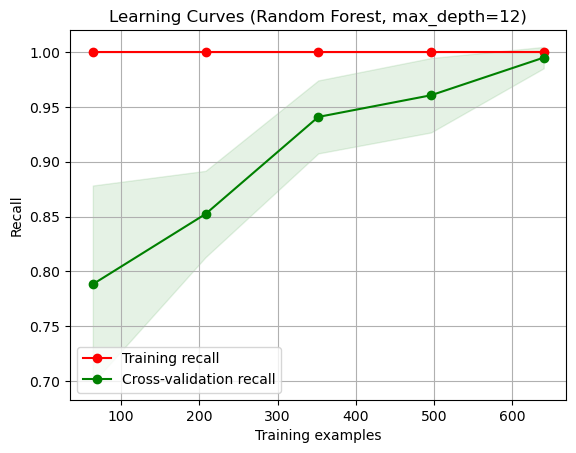

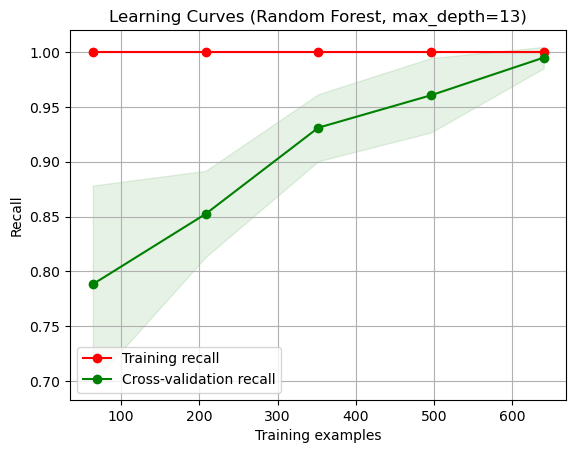

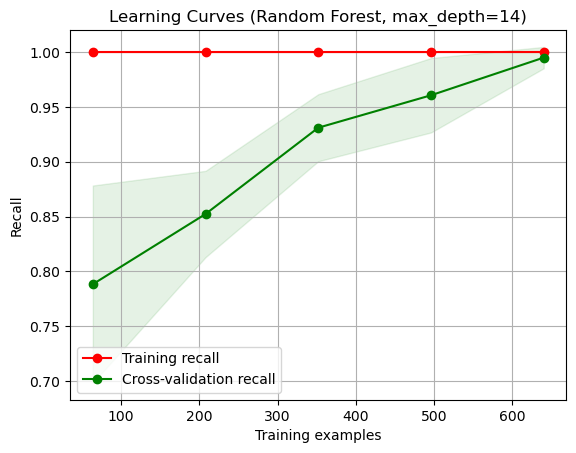

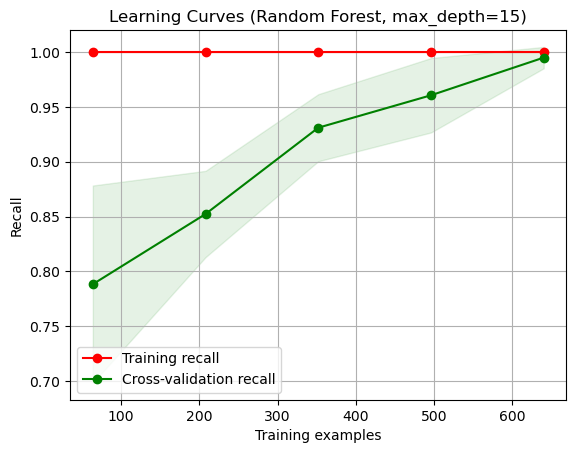

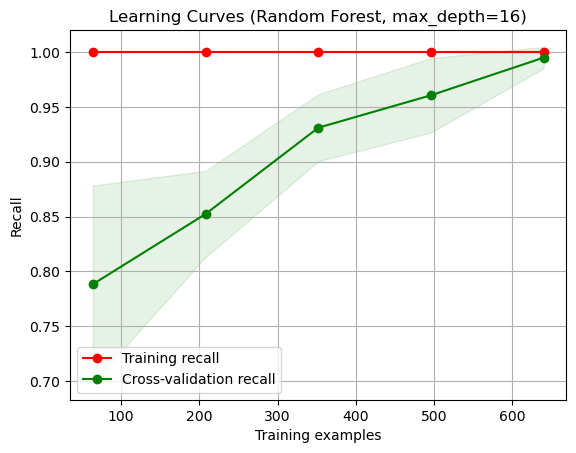

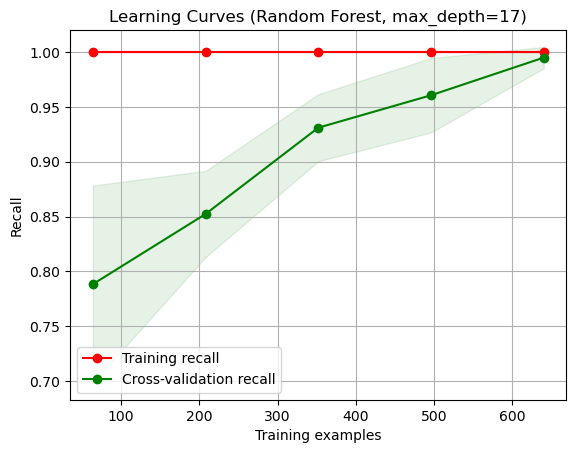

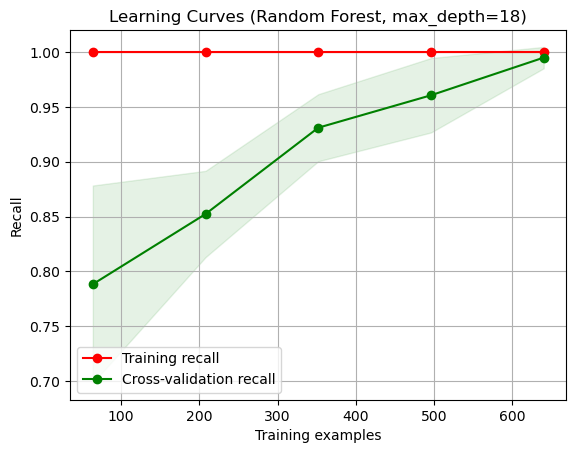

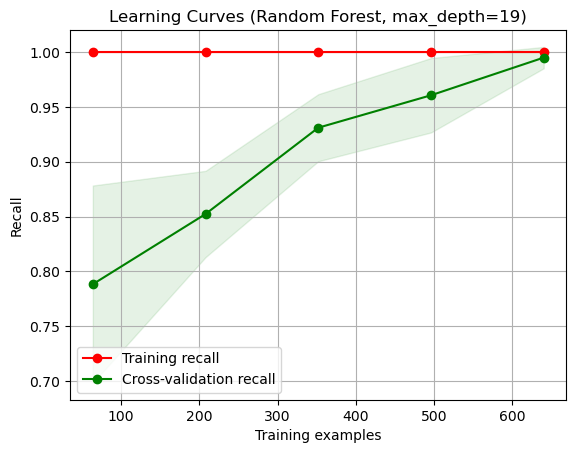

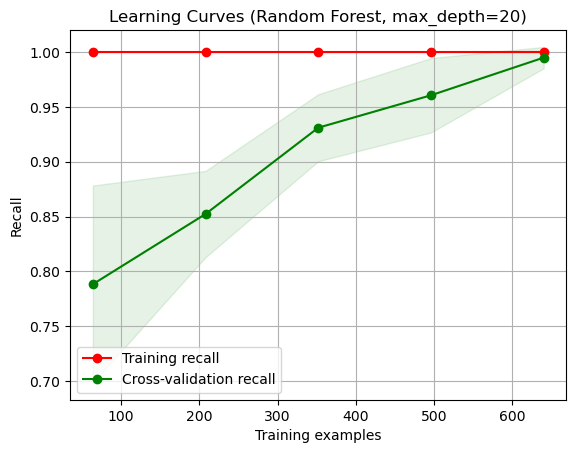

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt

for depth in range(1, 21, 1):
    rf_optimal = RandomForestClassifier(max_depth=depth, random_state=seed)
    title = f"Learning Curves (Random Forest, max_depth={depth})"
    plot_learning_curve(rf_optimal, title, x_train, y_train, n_jobs=-1, cv=5)

plt.show()

jika dilihat sekilas..semakin banyak max depth nya maka akan semakin overfitting dia, justru yang paling bagus adalah ketika max depthnya= 5, dikarenakan skor training recall dan cross-validation recallnya meskipun pada awalnya ada penurunan dari skor training recal, tapi pada satu titik data ke sekian akan stabil pada nilai yang tinggi sepanjang rentang data latih, ini bisa menjadi indikasi bahwa model tidak mengalami overfitting, tetapi telah belajar dengan baik dari data latih dan mampu mempertahankan kinerja yang baik pada data uji yang belum pernah dilihat sebelumnya.

sekarang mari kita lihat jika datanya di sandarisasi apakah nilai recalnya akan bertambah

# random forest cross validation parameter tunning max depth dengan data yang di standarisasi

In [ ]:
for i in range(1,21,1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    rf = RandomForestClassifier(random_state=seed, max_depth=i)
    rf.fit(x_train_scaled, y_train)

    y_pred_train = rf.predict(x_train_scaled)
    y_pred_test = rf.predict(x_test_scaled)

    recall_test = recall_score(y_test, y_pred_test)
    print(f"recall test model Random Forest min max scaler max_depth={i} :", recall_test)
    recall_train = recall_score(y_train, y_pred_train)
    print(f"recall train model Random Forest min max scaler max_depth={i} :", recall_train)
    print("\n")

recall test model Random Forest min max scaler max_depth=1 : 0.9117647058823529
recall train model Random Forest min max scaler max_depth=1 : 0.8817733990147784


recall test model Random Forest min max scaler max_depth=2 : 0.9411764705882353
recall train model Random Forest min max scaler max_depth=2 : 0.896551724137931


recall test model Random Forest min max scaler max_depth=3 : 0.9313725490196079
recall train model Random Forest min max scaler max_depth=3 : 0.8990147783251231


recall test model Random Forest min max scaler max_depth=4 : 0.9705882352941176
recall train model Random Forest min max scaler max_depth=4 : 0.9482758620689655


recall test model Random Forest min max scaler max_depth=5 : 0.9901960784313726
recall train model Random Forest min max scaler max_depth=5 : 0.9802955665024631


recall test model Random Forest min max scaler max_depth=6 : 0.9901960784313726
recall train model Random Forest min max scaler max_depth=6 : 0.9876847290640394


recall test model Rando

# Learning curve random forest standart scalar

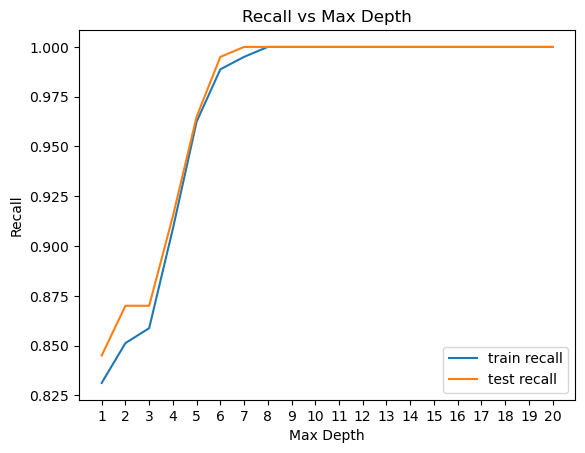

In [ ]:
neighbor = []
train_recall = []
test_recall = []

for i in range(1, 21, 1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    rf = RandomForestClassifier(random_state=seed, max_depth=i)
    rf.fit(x_train_scaled, y_train)

    y_pred_train = rf.predict(x_train_scaled)
    y_pred_test = rf.predict(x_test_scaled)

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    neighbor.append(i)
    train_recall.append(recall_train)
    test_recall.append(recall_test)

plt.plot(neighbor, train_recall, label="train recall")
plt.plot(neighbor, test_recall, label="test recall")
plt.xticks(range(1, 21, 1))
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Recall")
plt.title("Recall vs Max Depth")
plt.show()

pada learning curve di atas..nampak sangat mirip dengan data yang tidak di standarisasi, mari lihat learning curve satunya

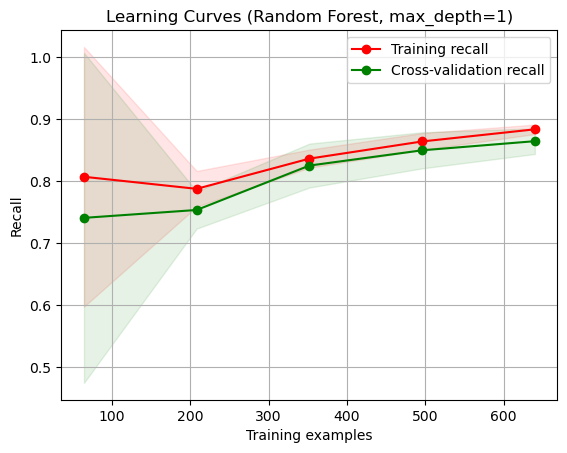

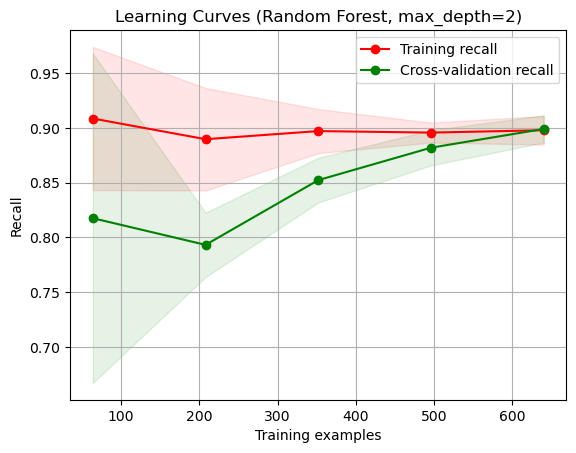

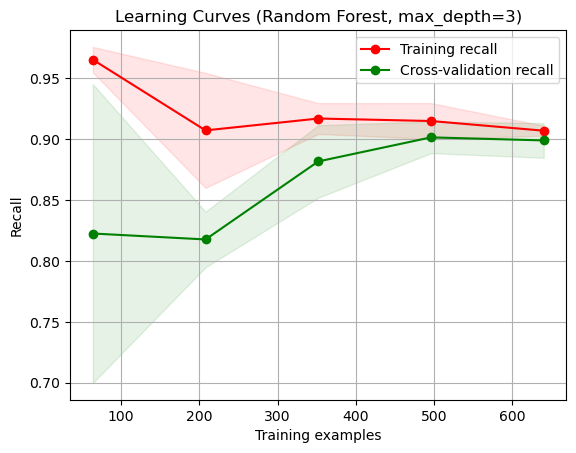

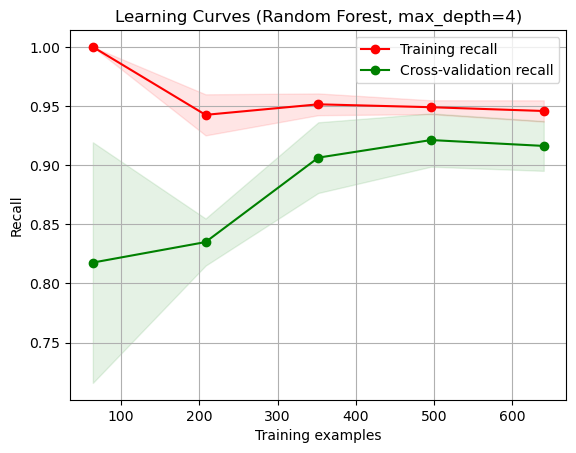

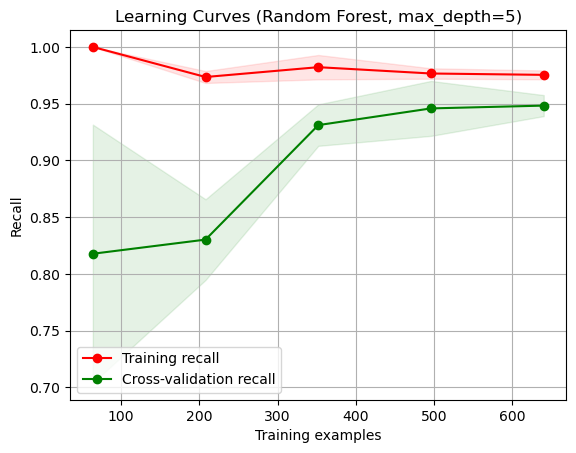

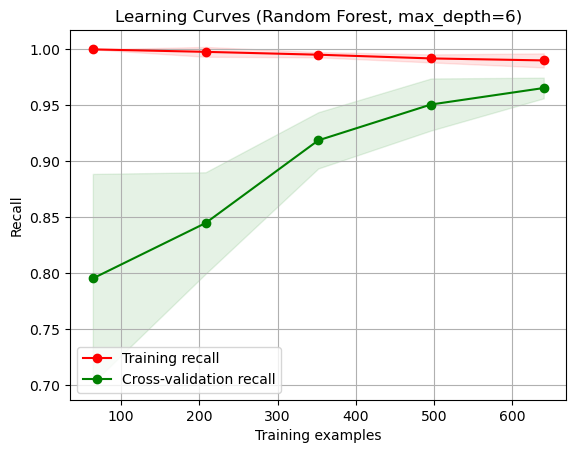

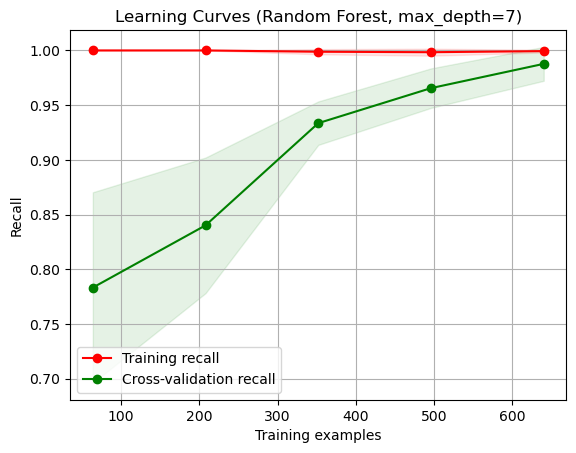

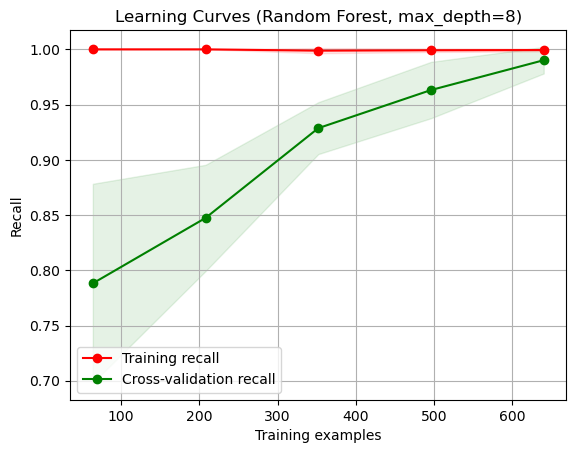

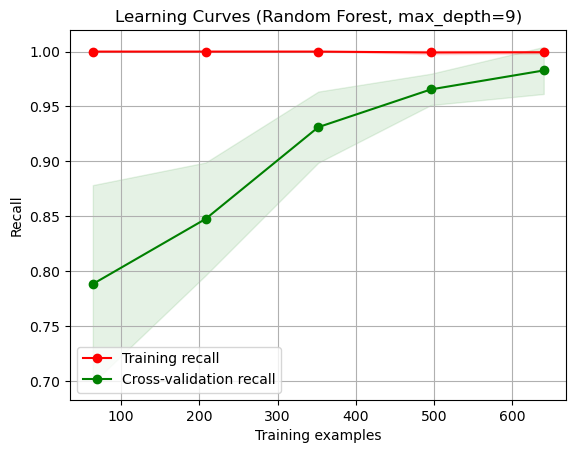

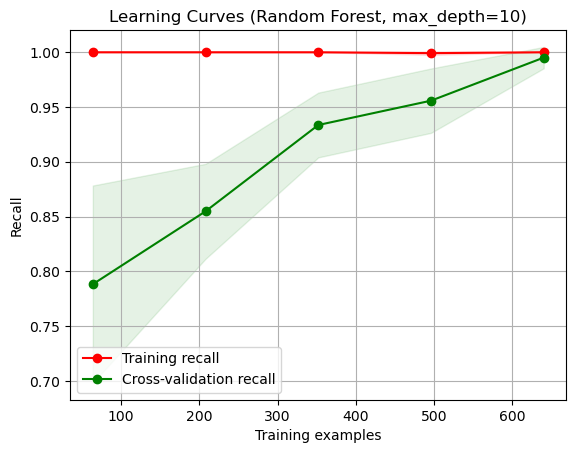

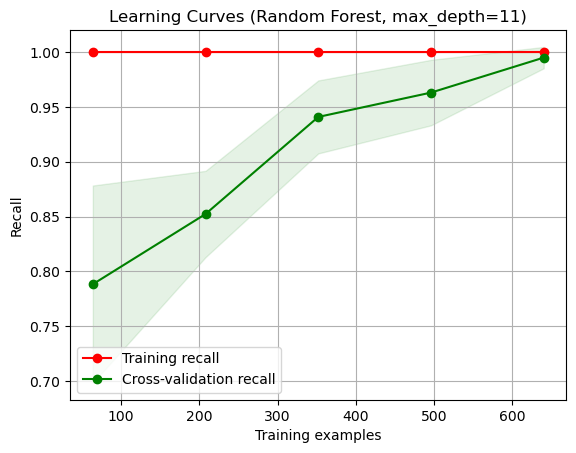

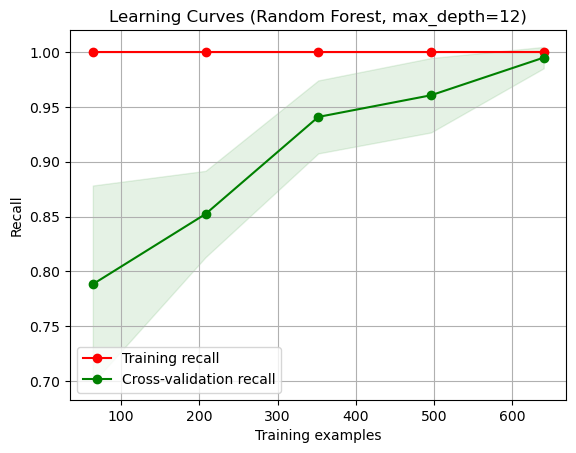

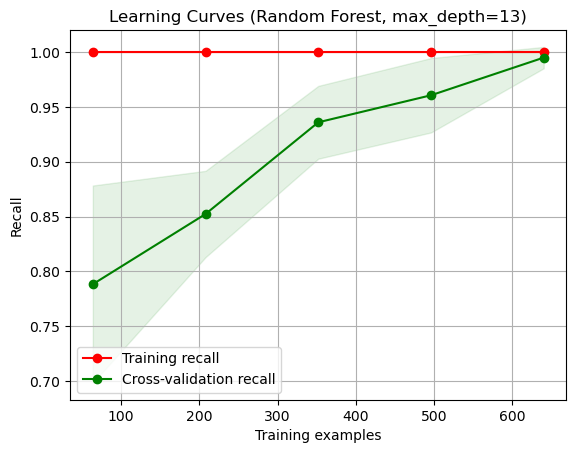

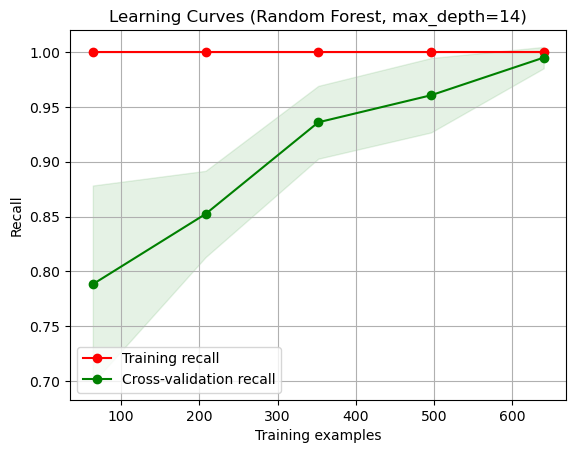

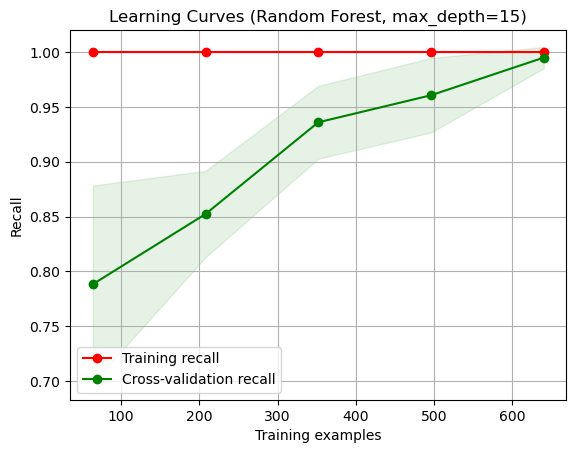

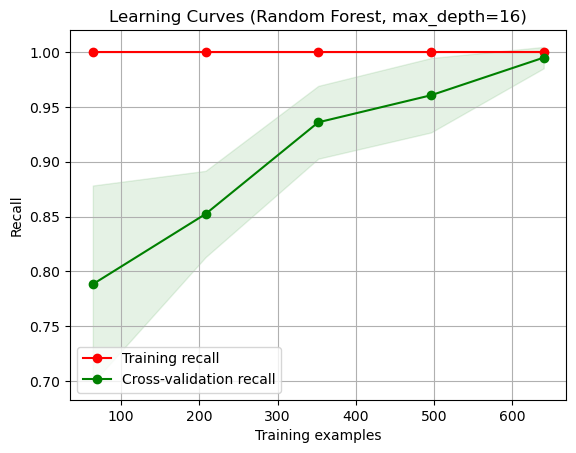

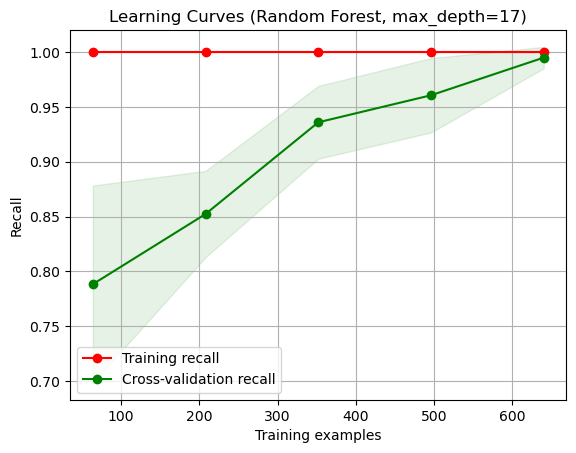

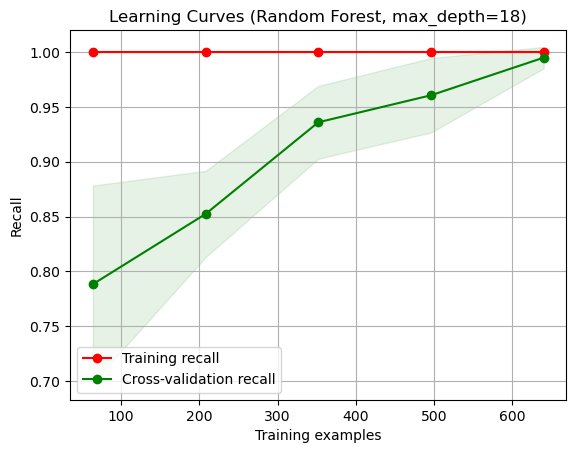

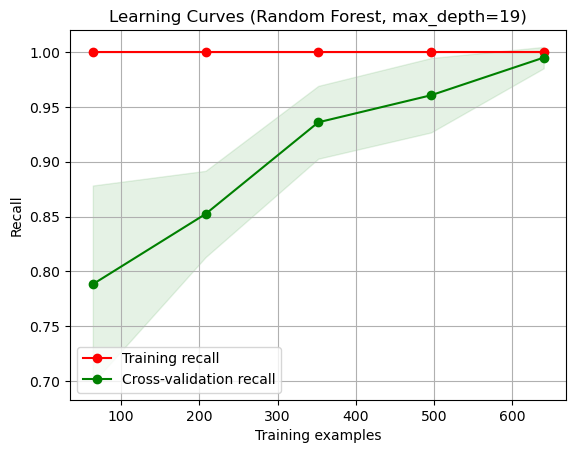

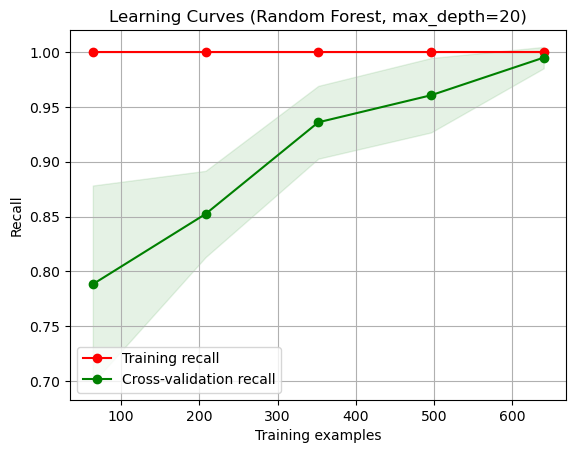

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Recall")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_scaled, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training recall")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation recall")

    plt.legend(loc="best")
    return plt

for depth in range(1, 21, 1):
    rf_optimal = RandomForestClassifier(max_depth=depth, random_state=seed)
    title = f"Learning Curves (Random Forest, max_depth={depth})"
    plot_learning_curve(rf_optimal, title, x_train, y_train, n_jobs=-1, cv=5)

plt.show()

pada learning curve yang sudah di cross validation pun hasil terbaik nampak pada max_depth=5..ini menunjukkan untuk sejauh ini baik kita melakukan feature enginering ataupun tidak, hasil terbaik tetap dipegang oleh max_depth=5, tapi itu hanya berlaku saat ini, apa yang akan terjadi jika saya melakukan hyperparameter tunning pada n_estimators dan max_depth

# random forest hyperparameter tunning n_estimator dan max_depth

In [ ]:
rf = RandomForestClassifier(random_state=seed)

param_grid = {
    "n_estimators": range(100,1100,100),
    "max_depth": range(5,36,5),

}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

best_rf = grid_search.best_estimator_

In [ ]:
print(best_rf)

RandomForestClassifier(max_depth=10, random_state=0)


In [ ]:
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


berdasarkan hasil GridsearchCV di atas..max_depth paling optimal adalah 10, dan n_estimators paling optimal adalah 100 yang berarti nilai defaultnya

tapi hasil itu berbeda dari asumsi saya seblumnya di mana saya berasumsi bahwa max_depth terbaik adalah 5, justri jika kita perhatikan kembali di atas bahwa untuk max_depth 10 malahan terjadi overfitting di mana nilai cross-validation recall yang naik secara perlahan secara konsisten dari awal data hingga akhir data menunjukkan bahwa model tidak dapat memgeneralisasi dengan baik pada data baru.